In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from numpy import sqrt, abs, round
from scipy.stats import t as t_dist
from numpy import sqrt, abs, round
from scipy.stats import norm
import warnings
warnings.filterwarnings(action = 'ignore')
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [2]:
# Importing data
df = pd.read_csv("C:\\Users\\Rohan\\Desktop\\AV Assignments\\EDA\\EDA Project 2\\agent_recruitment.csv")

In [3]:
df.head(10)

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,...,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,...,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0
5,FIN1000006,814112,4/16/2007,814114.0,M,3/23/1988,S,Others,Class XII,1/17/2006,...,Confirmation,M,2/20/1979,0.0,0.0,247118.0,24.0,247118.0,24.0,1
6,FIN1000007,842001,4/16/2007,844118.0,M,2/5/1969,M,Business,Class XII,9/1/2003,...,Confirmation,M,5/28/1969,0.0,0.0,315119.0,27.0,315119.0,27.0,1
7,FIN1000008,800001,4/16/2007,844103.0,M,1/28/1984,M,Salaried,Class XII,12/16/2006,...,Confirmation,M,1/7/1976,5.0,4.0,117358.0,9.0,117358.0,9.0,0
8,FIN1000009,209625,4/16/2007,206451.0,M,1/8/1976,M,Business,Graduate,11/18/2004,...,Confirmation,M,3/7/1966,0.0,0.0,244028.0,17.0,244028.0,17.0,1
9,FIN1000010,211001,4/16/2007,212218.0,M,2/3/1982,M,Others,Class XII,8/15/2002,...,Confirmation,M,11/14/1974,0.0,0.0,851557.0,39.0,851557.0,39.0,1


In [4]:
df.tail()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
9522,FIN1009523,160017,7/1/2008,160032.0,M,1/18/1970,M,Salaried,Graduate,5/5/2008,...,Probation,M,5/10/1967,0.0,0.0,0.0,0.0,0.0,0.0,0
9523,FIN1009524,848101,7/1/2008,848302.0,M,9/11/1956,M,NaN,Graduate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9524,FIN1009525,753012,7/1/2008,753014.0,F,8/7/1975,M,Salaried,Graduate,8/22/2006,...,Confirmation,M,7/22/1970,0.0,0.0,316126.0,9.0,305775.0,8.0,0
9525,FIN1009526,575003,7/1/2008,571248.0,M,12/23/1986,S,Salaried,Class XII,6/5/2008,...,Probation,M,9/23/1976,0.0,0.0,0.0,0.0,0.0,0.0,0
9526,FIN1009527,411006,7/1/2008,411006.0,F,2/7/1976,M,Others,Graduate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
df[['Manager_Joining_Designation','Manager_Current_Designation','Manager_Grade']].head()

,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade
0,Level 1,Level 2,3.0
1,Level 1,Level 2,3.0
2,Level 1,Level 1,2.0
3,Level 1,Level 3,4.0
4,Level 1,Level 1,2.0


In [6]:
df.shape

(9527, 23)

In [7]:
df.columns

Index(['ID', 'Office_PIN', 'Application_Receipt_Date', 'Applicant_City_PIN',
       'Applicant_Gender', 'Applicant_BirthDate', 'Applicant_Marital_Status',
       'Applicant_Occupation', 'Applicant_Qualification', 'Manager_DOJ',
       'Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Status', 'Manager_Gender', 'Manager_DoB',
       'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
       'Manager_Num_Products', 'Manager_Business2', 'Manager_Num_Products2',
       'Business_Sourced'],
      dtype='object')

In [8]:
df.drop(['ID','Office_PIN','Applicant_City_PIN'], axis=1, inplace = True)

In [9]:
df.dtypes

Application_Receipt_Date        object
Applicant_Gender                object
Applicant_BirthDate             object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_DOJ                     object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_DoB                     object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced                 int64
dtype: object

In [10]:
(df.isnull().sum()/df.shape[0])*100

Application_Receipt_Date        0.000000
Applicant_Gender                0.703264
Applicant_BirthDate             0.766243
Applicant_Marital_Status        0.766243
Applicant_Occupation           12.816207
Applicant_Qualification         0.902698
Manager_DOJ                     7.169098
Manager_Joining_Designation     7.169098
Manager_Current_Designation     7.169098
Manager_Grade                   7.169098
Manager_Status                  7.169098
Manager_Gender                  7.169098
Manager_DoB                     7.169098
Manager_Num_Application         7.169098
Manager_Num_Coded               7.169098
Manager_Business                7.169098
Manager_Num_Products            7.169098
Manager_Business2               7.169098
Manager_Num_Products2           7.169098
Business_Sourced                0.000000
dtype: float64

##### MISSING VALUE TREATMENT

In [11]:
df.dropna(subset = ['Manager_DOJ','Manager_Joining_Designation','Manager_Current_Designation','Manager_Grade','Manager_Status','Manager_Gender','Manager_DoB','Manager_Num_Application','Manager_Num_Coded','Manager_Business','Manager_Num_Products','Manager_Business2','Manager_Num_Products2' ], inplace = True)

In [12]:
df['Applicant_Gender'].fillna(df['Applicant_Gender'].mode()[0], inplace = True)
df['Applicant_BirthDate'].fillna(df['Applicant_BirthDate'].mode()[0], inplace = True)
df['Applicant_Marital_Status'].fillna(df['Applicant_Marital_Status'].mode()[0], inplace = True)
df['Applicant_Occupation'].fillna(df['Applicant_Occupation'].mode()[0], inplace = True)
df['Applicant_Qualification'].fillna(df['Applicant_Qualification'].mode()[0], inplace = True)

###  TYPECASTING

In [13]:
print('This data is composed of: \n', '\033[1m -', (df.dtypes == 'int64').sum(), '\033[0m', 
      'Integer variables \n', '\033[1m -', (df.dtypes == 'float64').sum(), '\033[0m',
     'Float variables \n', '\033[1m -', (df.dtypes == 'object').sum(), '\033[0m', 'Object variables')

This data is composed of: 
  - 1  Integer variables 
  - 7  Float variables 
  - 12  Object variables


In [14]:
# Finding out the integers variables
df.dtypes[df.dtypes == 'int64']

Business_Sourced    int64
dtype: object

In [15]:
# Finding out the float variables
df.dtypes[df.dtypes == 'float64']

Manager_Grade              float64
Manager_Num_Application    float64
Manager_Num_Coded          float64
Manager_Business           float64
Manager_Num_Products       float64
Manager_Business2          float64
Manager_Num_Products2      float64
dtype: object

In [16]:
# Finding out the object variables
df.dtypes[df.dtypes == 'object']

Application_Receipt_Date       object
Applicant_Gender               object
Applicant_BirthDate            object
Applicant_Marital_Status       object
Applicant_Occupation           object
Applicant_Qualification        object
Manager_DOJ                    object
Manager_Joining_Designation    object
Manager_Current_Designation    object
Manager_Status                 object
Manager_Gender                 object
Manager_DoB                    object
dtype: object

In [17]:
#Typecasting some of the object variables to datetime64
df['Application_Receipt_Date'] = df['Application_Receipt_Date'].astype('datetime64')
df['Applicant_BirthDate'] = df['Applicant_BirthDate'].astype('datetime64')
df['Manager_DOJ'] = df['Manager_DOJ'].astype('datetime64')
df['Manager_DoB'] = df['Manager_DoB'].astype('datetime64')

In [18]:
#Typecasting some of the object variables to category
df['Applicant_Gender'] = df['Applicant_Gender'].astype('category')
df['Applicant_Marital_Status'] = df['Applicant_Marital_Status'].astype('category')
df['Applicant_Occupation'] = df['Applicant_Occupation'].astype('category')
df['Applicant_Qualification'] = df['Applicant_Qualification'].astype('category')
df['Manager_Joining_Designation'] = df['Manager_Joining_Designation'].astype('category')
df['Manager_Current_Designation'] = df['Manager_Current_Designation'].astype('category')
df['Manager_Status'] = df['Manager_Status'].astype('category')
df['Manager_Gender'] = df['Manager_Gender'].astype('category')
df['Manager_Grade'] = df['Manager_Grade'].astype('category')

In [19]:
#Typecasting some of the float64 variables to int64
df['Manager_Num_Application'] = df['Manager_Num_Application'].astype('int64')
df['Manager_Num_Coded'] = df['Manager_Num_Coded'].astype('int64')
df['Manager_Business'] = df['Manager_Business'].astype('int64')
df['Manager_Num_Products'] = df['Manager_Num_Products'].astype('int64')
df['Manager_Business2'] = df['Manager_Business2'].astype('int64')
df['Manager_Num_Products2'] = df['Manager_Num_Products2'].astype('int64')

In [20]:
df['Target_variable'] = 0
df['Target_variable'][(df['Business_Sourced']== 1)] = 'Business Sourced'
df['Target_variable'][(df['Business_Sourced']!= 1)] = 'Not Business Sourced '
df['Target_variable'] = df['Target_variable'].astype('category')

In [21]:
df.dtypes

Application_Receipt_Date       datetime64[ns]
Applicant_Gender                     category
Applicant_BirthDate            datetime64[ns]
Applicant_Marital_Status             category
Applicant_Occupation                 category
Applicant_Qualification              category
Manager_DOJ                    datetime64[ns]
Manager_Joining_Designation          category
Manager_Current_Designation          category
Manager_Grade                        category
Manager_Status                       category
Manager_Gender                       category
Manager_DoB                    datetime64[ns]
Manager_Num_Application                 int64
Manager_Num_Coded                       int64
Manager_Business                        int64
Manager_Num_Products                    int64
Manager_Business2                       int64
Manager_Num_Products2                   int64
Business_Sourced                        int64
Target_variable                      category
dtype: object

In [22]:
df['Applicant_Age'] = (df['Application_Receipt_Date'] - df['Applicant_BirthDate'])/ np.timedelta64(1, 'Y')
df['Applicant_Age'] = df['Applicant_Age'].astype('int64')

df['Manager_Age'] = (df['Manager_DOJ'] - df['Manager_DoB'])/ np.timedelta64(1, 'Y')
df['Manager_Age'] = df['Manager_Age'].astype('int64')

In [23]:
df.drop(['Applicant_BirthDate','Manager_DoB'], axis=1, inplace = True)

In [24]:
df.drop(['Application_Receipt_Date','Manager_DOJ'], axis=1, inplace = True)

In [25]:
df.dtypes

Applicant_Gender               category
Applicant_Marital_Status       category
Applicant_Occupation           category
Applicant_Qualification        category
Manager_Joining_Designation    category
Manager_Current_Designation    category
Manager_Grade                  category
Manager_Status                 category
Manager_Gender                 category
Manager_Num_Application           int64
Manager_Num_Coded                 int64
Manager_Business                  int64
Manager_Num_Products              int64
Manager_Business2                 int64
Manager_Num_Products2             int64
Business_Sourced                  int64
Target_variable                category
Applicant_Age                     int64
Manager_Age                       int64
dtype: object

In [135]:
df["Applicant_Qualification"].unique()

array(['Graduate', 'Class XII', 'Class X', 'Others'], dtype=object)

In [134]:
df["Applicant_Qualification"].replace({"Masters of Business Administration": "Others",'Associate/Fellow of Institute of Company Secretories of India': "Others",'Associate / Fellow of Institute of Chartered Accountans of India': "Others",'Associate/Fellow of Insurance Institute of India':"Others",'Associate/Fellow of Acturial Society of India':"Others",'Professional Qualification in Marketing':"Others"},inplace = True)

### UNIVARIATE ANALYSIS

####  NUMERICAL VARIABLES

In [26]:
numerical = df.select_dtypes(include=['int64'])
numerical.dtypes

Manager_Num_Application    int64
Manager_Num_Coded          int64
Manager_Business           int64
Manager_Num_Products       int64
Manager_Business2          int64
Manager_Num_Products2      int64
Business_Sourced           int64
Applicant_Age              int64
Manager_Age                int64
dtype: object

In [27]:
for i in numerical.columns:
    print(f'range of {i}:[{df[i].min()}, {df[i].max()}]')

range of Manager_Num_Application:[0, 22]
range of Manager_Num_Coded:[0, 9]
range of Manager_Business:[-265289, 3578265]
range of Manager_Num_Products:[0, 101]
range of Manager_Business2:[-265289, 3578265]
range of Manager_Num_Products2:[0, 101]
range of Business_Sourced:[0, 1]
range of Applicant_Age:[15, 77]
range of Manager_Age:[19, 56]


In [28]:
def UVA_KDE(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  for j,i in enumerate(var_group):
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    points = mean-st_dev, mean+st_dev
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(round(kurt,2),round(skew,2),
                                                                                     round(ran,2),
                                                                                     round(mean,2),
                                                                                     round(median,2)))

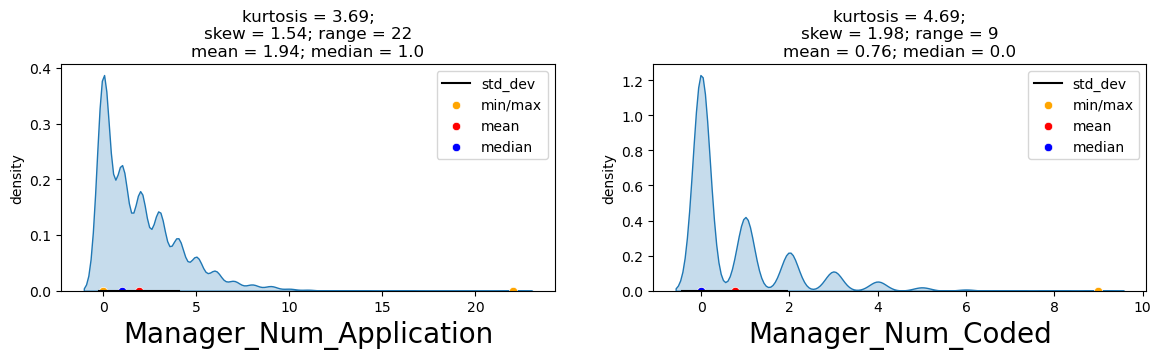

In [29]:
UVA_KDE(df,['Manager_Num_Application','Manager_Num_Coded'])

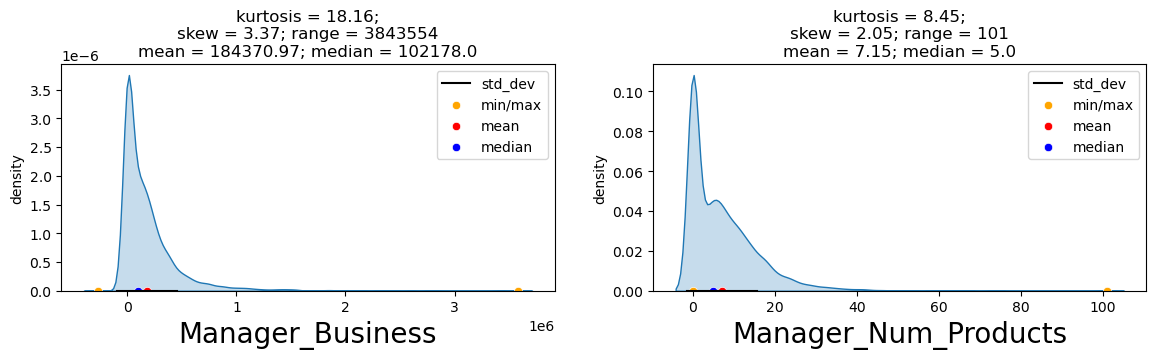

In [30]:
UVA_KDE(df,['Manager_Business','Manager_Num_Products'])

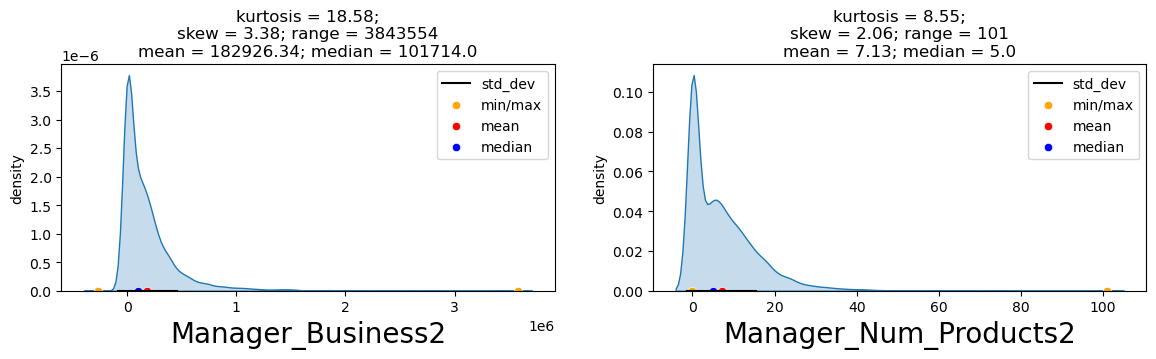

In [31]:
UVA_KDE(df,['Manager_Business2','Manager_Num_Products2'])

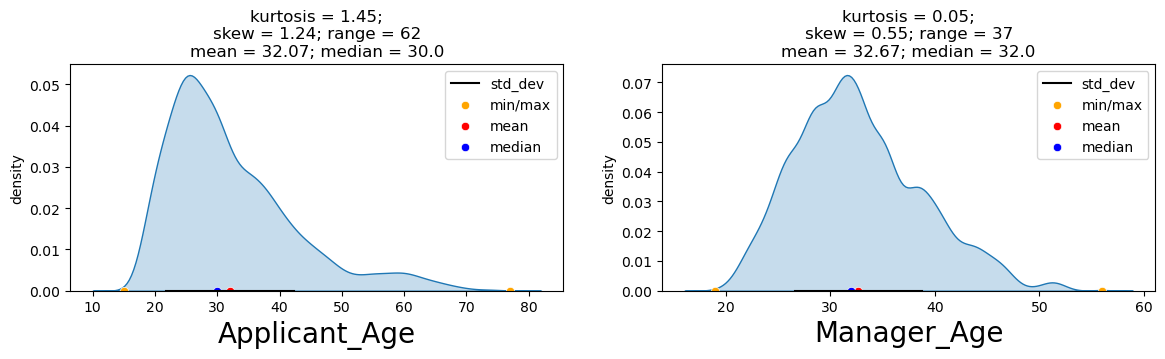

In [32]:
UVA_KDE(df,['Applicant_Age','Manager_Age'])

In [33]:
def UVA_boxplot(data, var_group, include_outlier = True):
  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  from scipy import stats
  for j,i in enumerate(var_group):
   
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)
    skew = data[i].skew()
    mini = data[i].min()
    maxi = data[i].max()
    kurt = data[i].kurtosis()
    shapiro_test = stats.shapiro(data[i])
    
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])
    
    plt.subplot(1,size,j+1)
    sns.boxplot(data[i], orient="v")
    plt.ylabel('{}'.format(i))
    plt.title('Skew = {}; Range = {} \n 1st, 2nd, 3rd  quartile = {};\n Whiskers = {}; kurtosis = {} ; \n Number of Outlier (low/high) = {} '.format(
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2)),
                                                                                                   (round(quant25,2),round(med,2),round(quant75,2)),
                                                                                                   (round(whis_low,2), round(whis_high,2)), 
                                                                                                   (round(kurt,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))


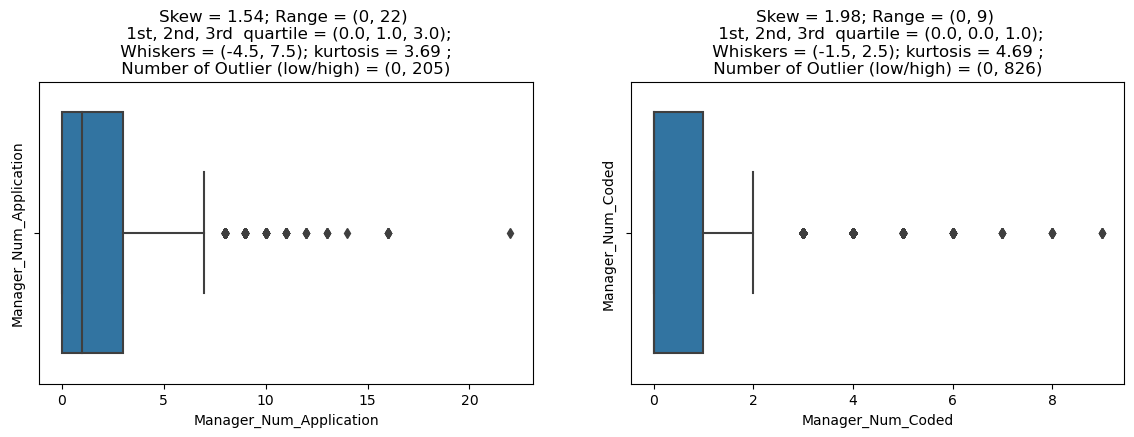

In [34]:
UVA_boxplot(df,['Manager_Num_Application','Manager_Num_Coded'])

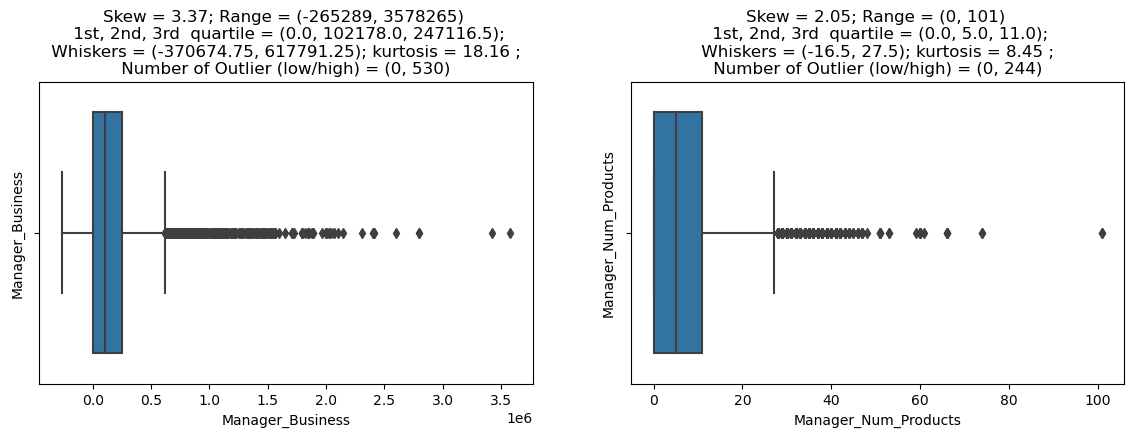

In [35]:
UVA_boxplot(df,['Manager_Business','Manager_Num_Products'])

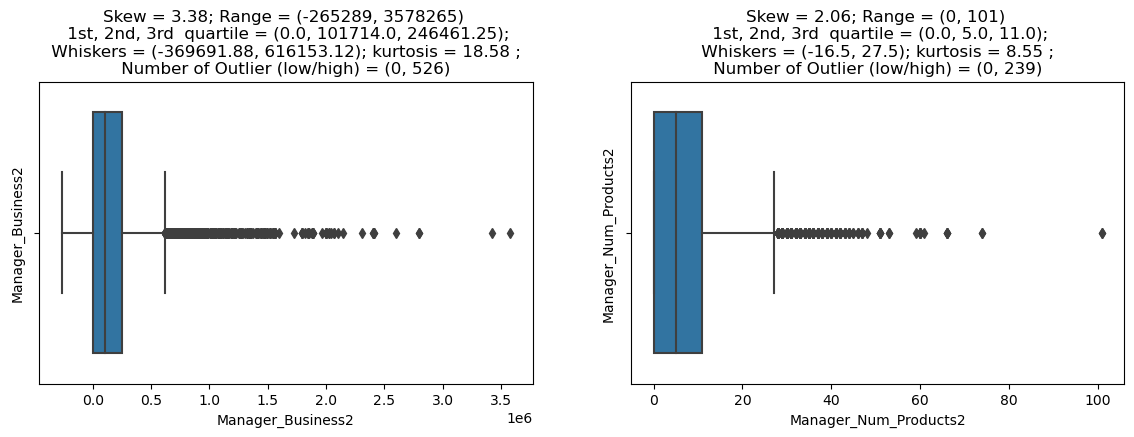

In [36]:
UVA_boxplot(df,['Manager_Business2','Manager_Num_Products2'])

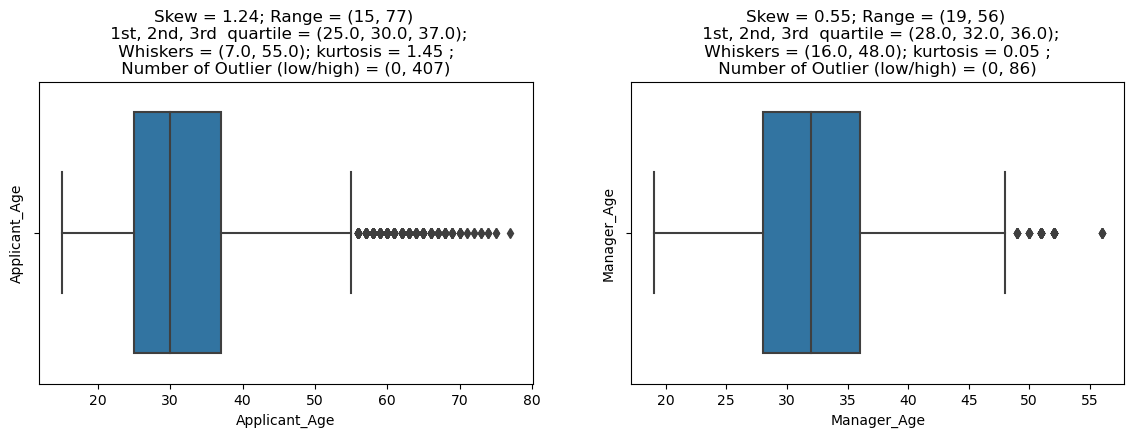

In [37]:
UVA_boxplot(df,['Applicant_Age','Manager_Age'])

#### CATEGORICAL VARIABLES

In [38]:
df.select_dtypes(include = [ 'category']).dtypes

Applicant_Gender               category
Applicant_Marital_Status       category
Applicant_Occupation           category
Applicant_Qualification        category
Manager_Joining_Designation    category
Manager_Current_Designation    category
Manager_Grade                  category
Manager_Status                 category
Manager_Gender                 category
Target_variable                category
dtype: object

In [39]:
def UVA_category(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,7), dpi = 100)
    
  for j,i in enumerate(var_group):
    norm_count = round(data[i].value_counts(normalize = True)*100,2)
    n_uni = data[i].nunique()
    sns.set_style('darkgrid')
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

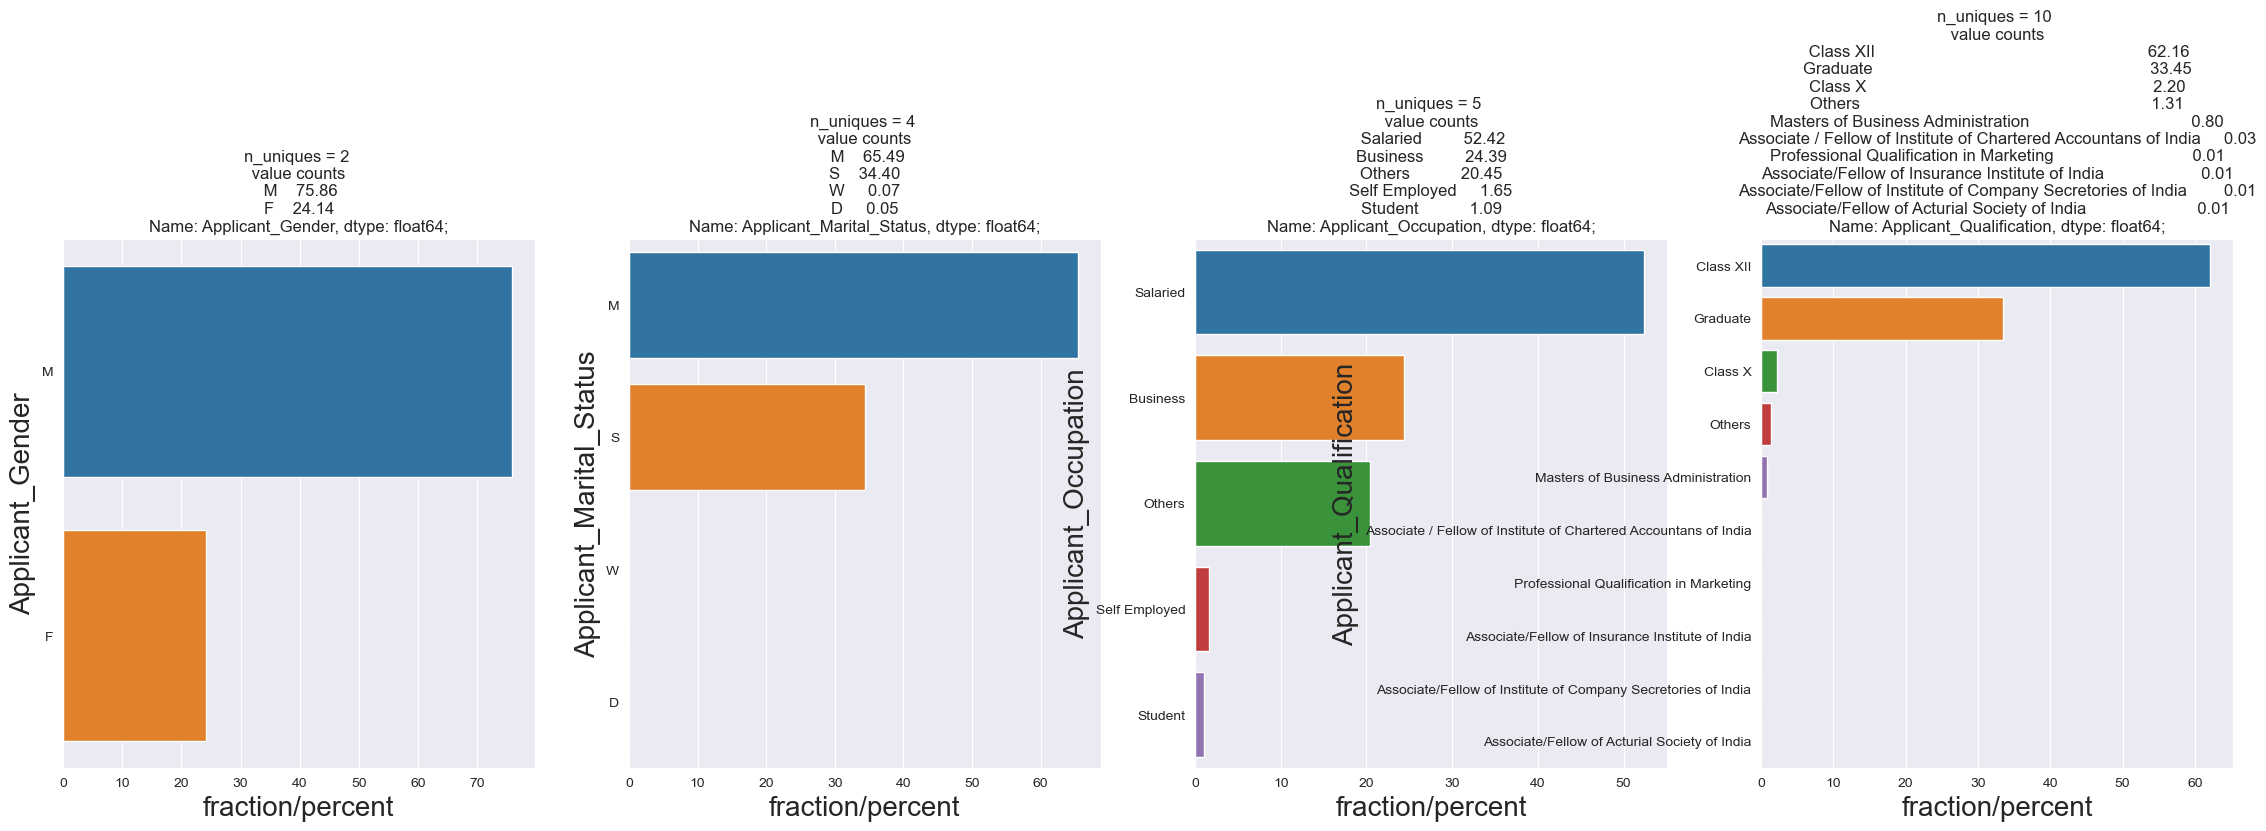

In [40]:
UVA_category(df, ['Applicant_Gender','Applicant_Marital_Status','Applicant_Occupation','Applicant_Qualification'])  

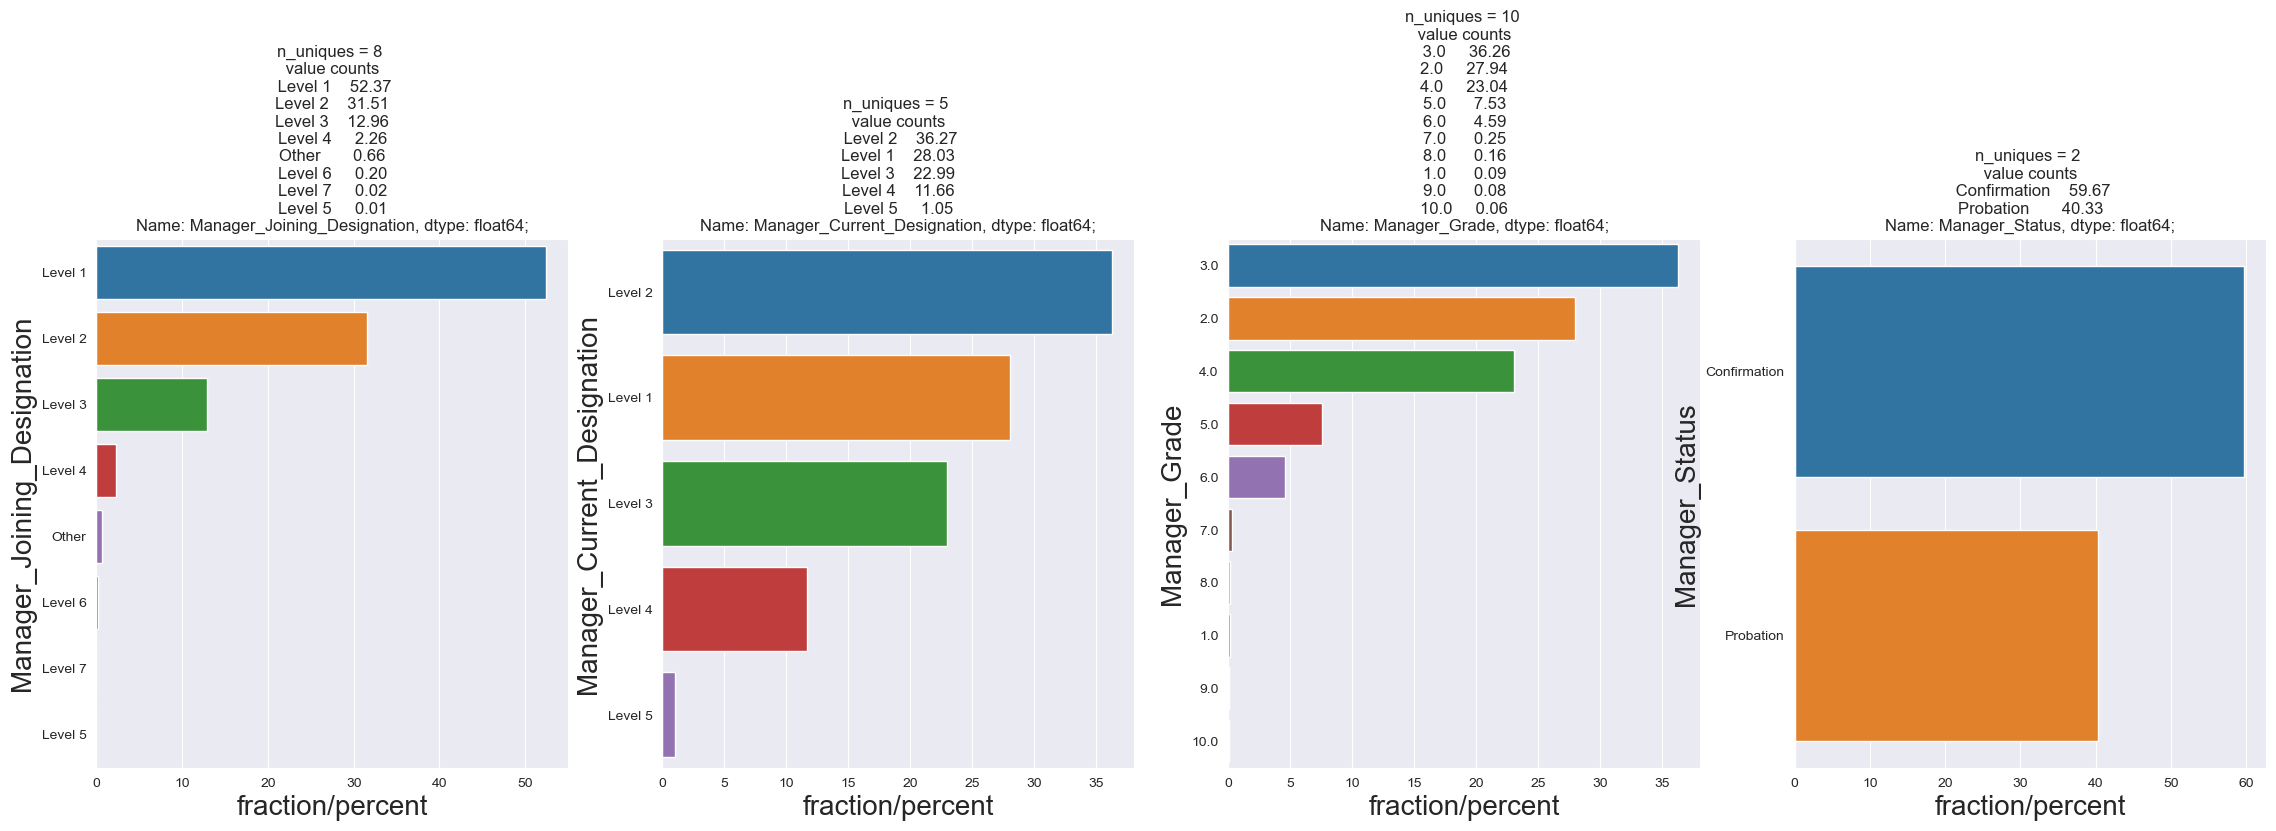

In [41]:
UVA_category(df, ['Manager_Joining_Designation','Manager_Current_Designation','Manager_Grade','Manager_Status'])  

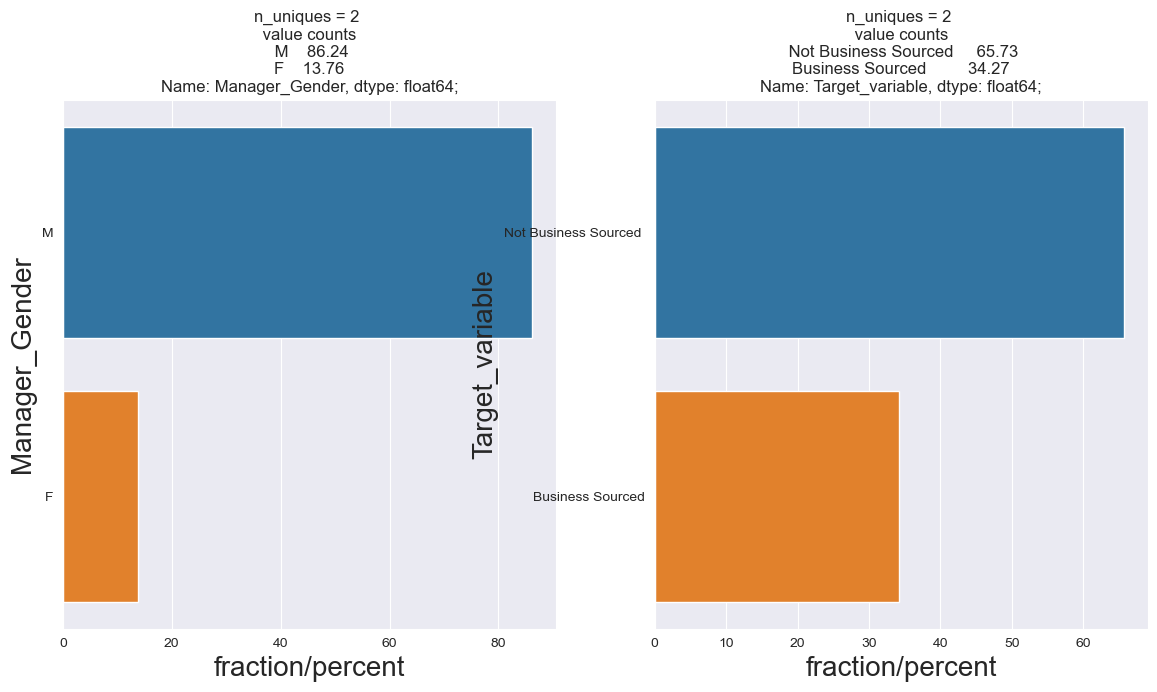

In [42]:
UVA_category(df, ['Manager_Gender','Target_variable'])

In [43]:
# range of Manager_Num_Application:[0, 22]
# range of Manager_Num_Coded:[0, 9]
# range of Manager_Business:[-265289, 3578265]
# range of Manager_Num_Products:[0, 101]
# range of Manager_Business2:[-265289, 3578265]
# range of Manager_Num_Products2:[0, 101]
# range of Business_Sourced:[0, 1]
# range of Applicant_Age:[15, 77]
# range of Manager_Age:[19, 56]

In [44]:
df['applicant_age_range'] = 'str'
df['applicant_age_range'][(df['Applicant_Age']<= 40)] = 'Young adults'
df['applicant_age_range'][(df['Applicant_Age']>40)] = 'Old-aged adults'
df['applicant_age_range'] = df['applicant_age_range'].astype('category')

df['manager_age_range'] = 'str'
df['manager_age_range'][(df['Manager_Age']<= 40)] = 'Young adults'
df['manager_age_range'][(df['Manager_Age']>40)] = 'Old-aged adults'
df['manager_age_range'] = df['manager_age_range'].astype('category')

df['Manager_Business_Range'] = 'str'
df['Manager_Business_Range'][(df['Manager_Business']<= 0)] = 'Not Satisfactory'
df['Manager_Business_Range'][(df['Manager_Business']> 0) & (df['Manager_Business']<= 75000)] = 'Low'
df['Manager_Business_Range'][(df['Manager_Business']> 75000) & (df['Manager_Business']<= 200000)] = 'Medium'
df['Manager_Business_Range'][(df['Manager_Business']> 200000) & (df['Manager_Business']<= 500000 )] = 'High'
df['Manager_Business_Range'][df['Manager_Business']> 500000] = 'Very High'
df['Manager_Business_Range'] = df['Manager_Business_Range'].astype('category')

df['Manager_Products_Range'] = 'str'
df['Manager_Products_Range'][(df['Manager_Num_Products']<= 5)] = '0-5'
df['Manager_Products_Range'][(df['Manager_Num_Products']> 5) & (df['Manager_Num_Products']<= 11)] = '6-11'
df['Manager_Products_Range'][(df['Manager_Num_Products']> 11) & (df['Manager_Num_Products']<= 25)] = '11-25'
df['Manager_Products_Range'][df['Manager_Num_Products']> 25] = '25-101'
df['Manager_Products_Range'] = df['Manager_Products_Range'].astype('category')

df['Manager_Business2_Range'] = 'str'
df['Manager_Business2_Range'][(df['Manager_Business2']<= 0)] = 'Not Satisfactory'
df['Manager_Business2_Range'][(df['Manager_Business2']> 0) & (df['Manager_Business2']<= 75000)] = 'Low'
df['Manager_Business2_Range'][(df['Manager_Business2']> 75000) & (df['Manager_Business2']<= 200000)] = 'Medium'
df['Manager_Business2_Range'][(df['Manager_Business2']> 200000) & (df['Manager_Business2']<= 500000 )] = 'High'
df['Manager_Business2_Range'][df['Manager_Business2']> 500000] = 'Very High'
df['Manager_Business2_Range'] = df['Manager_Business2_Range'].astype('category')

df['Manager_Products2_Range'] = 'str'
df['Manager_Products2_Range'][(df['Manager_Num_Products2']<= 5)] = '0-5'
df['Manager_Products2_Range'][(df['Manager_Num_Products2']> 5) & (df['Manager_Num_Products2']<= 11)] = '6-11'
df['Manager_Products2_Range'][(df['Manager_Num_Products2']> 11) & (df['Manager_Num_Products2']<= 25)] = '11-25'
df['Manager_Products2_Range'][df['Manager_Num_Products2']> 25] = '25-101'
df['Manager_Products2_Range'] = df['Manager_Products2_Range'].astype('category')

In [45]:
df.head()

,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,...,Business_Sourced,Target_variable,Applicant_Age,Manager_Age,applicant_age_range,manager_age_range,Manager_Business_Range,Manager_Products_Range,Manager_Business2_Range,Manager_Products2_Range
0,M,M,Others,Graduate,Level 1,Level 2,3.0,Confirmation,M,2,...,0,Not Business Sourced,35,27,Young adults,Young adults,High,25-101,High,25-101
1,M,S,Others,Class XII,Level 1,Level 2,3.0,Confirmation,M,2,...,1,Business Sourced,24,27,Young adults,Young adults,High,25-101,High,25-101
2,M,M,Business,Class XII,Level 1,Level 1,2.0,Confirmation,M,0,...,0,Not Business Sourced,41,37,Old-aged adults,Young adults,High,11-25,High,11-25
3,M,S,Salaried,Class XII,Level 1,Level 3,4.0,Confirmation,F,0,...,0,Not Business Sourced,19,25,Young adults,Young adults,High,11-25,High,11-25
4,M,M,Others,Class XII,Level 1,Level 1,2.0,Confirmation,M,2,...,0,Not Business Sourced,21,35,Young adults,Young adults,High,11-25,High,11-25


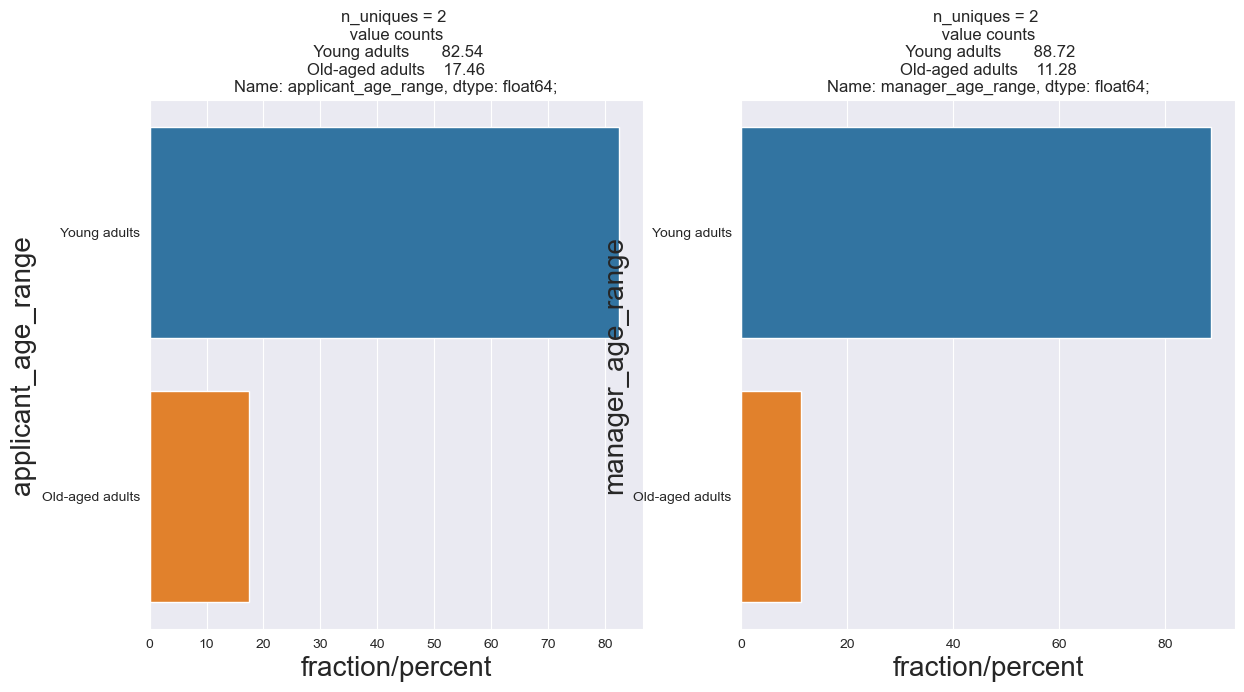

In [46]:
UVA_category(df, ['applicant_age_range','manager_age_range'])

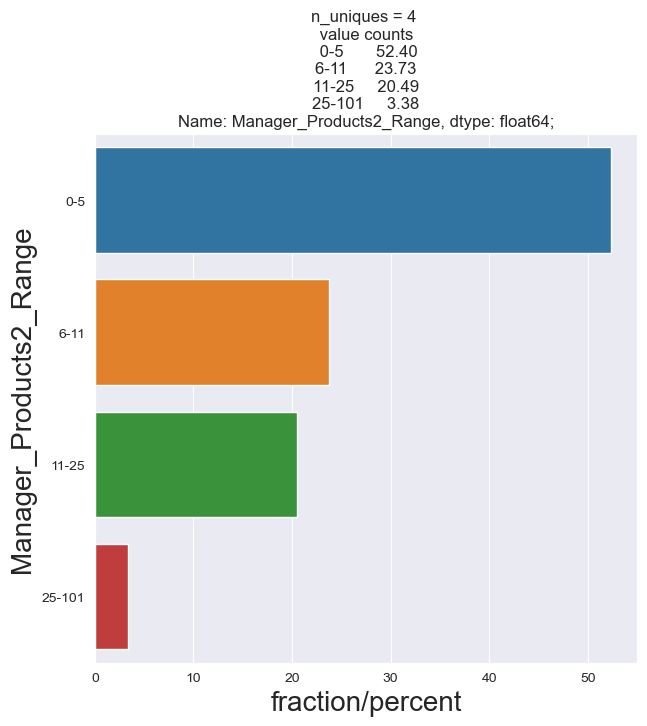

In [159]:
UVA_category(df, ['Manager_Products2_Range'])

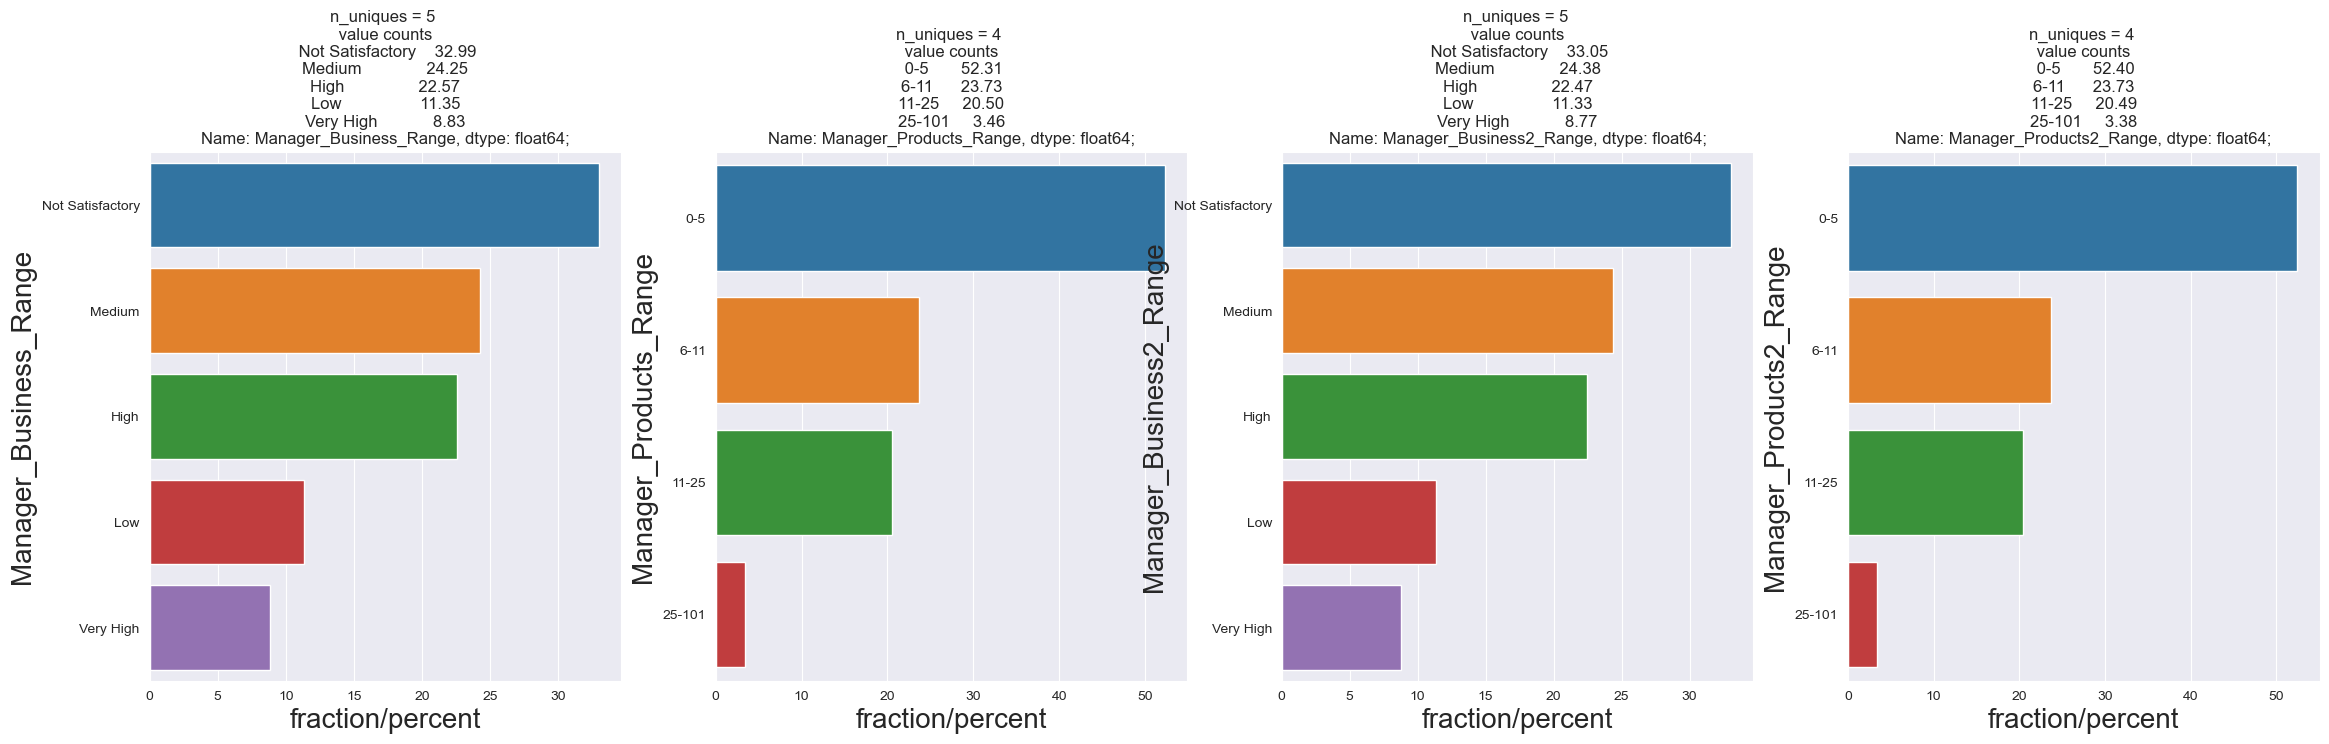

In [47]:
UVA_category(df, ['Manager_Business_Range','Manager_Products_Range','Manager_Business2_Range','Manager_Products2_Range'])

###  BIVARIATE ANALYSIS

####  NUMERICAL - NUMERICAL

In [48]:
numerical = df.select_dtypes(exclude = ['category'])[:]
numerical.dtypes

Manager_Num_Application    int64
Manager_Num_Coded          int64
Manager_Business           int64
Manager_Num_Products       int64
Manager_Business2          int64
Manager_Num_Products2      int64
Business_Sourced           int64
Applicant_Age              int64
Manager_Age                int64
dtype: object

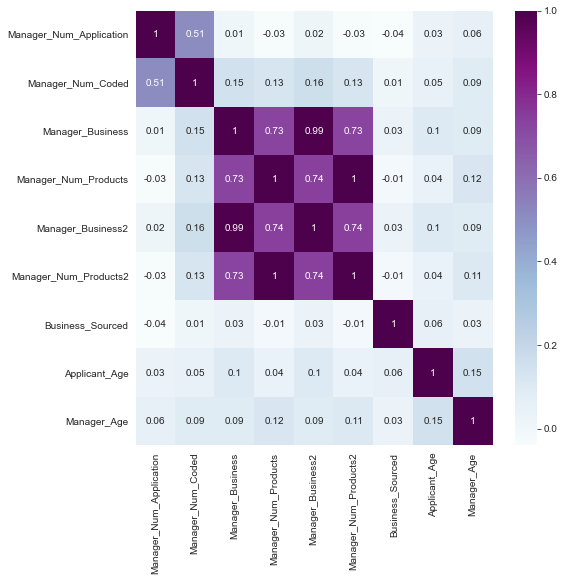

In [49]:
rounded = round(df.corr(method = 'pearson'),2)
plt.figure(figsize=(8,8))
ax = sns.heatmap(rounded, cmap='BuPu', annot=True)
plt.show()

<Figure size 840x560 with 0 Axes>

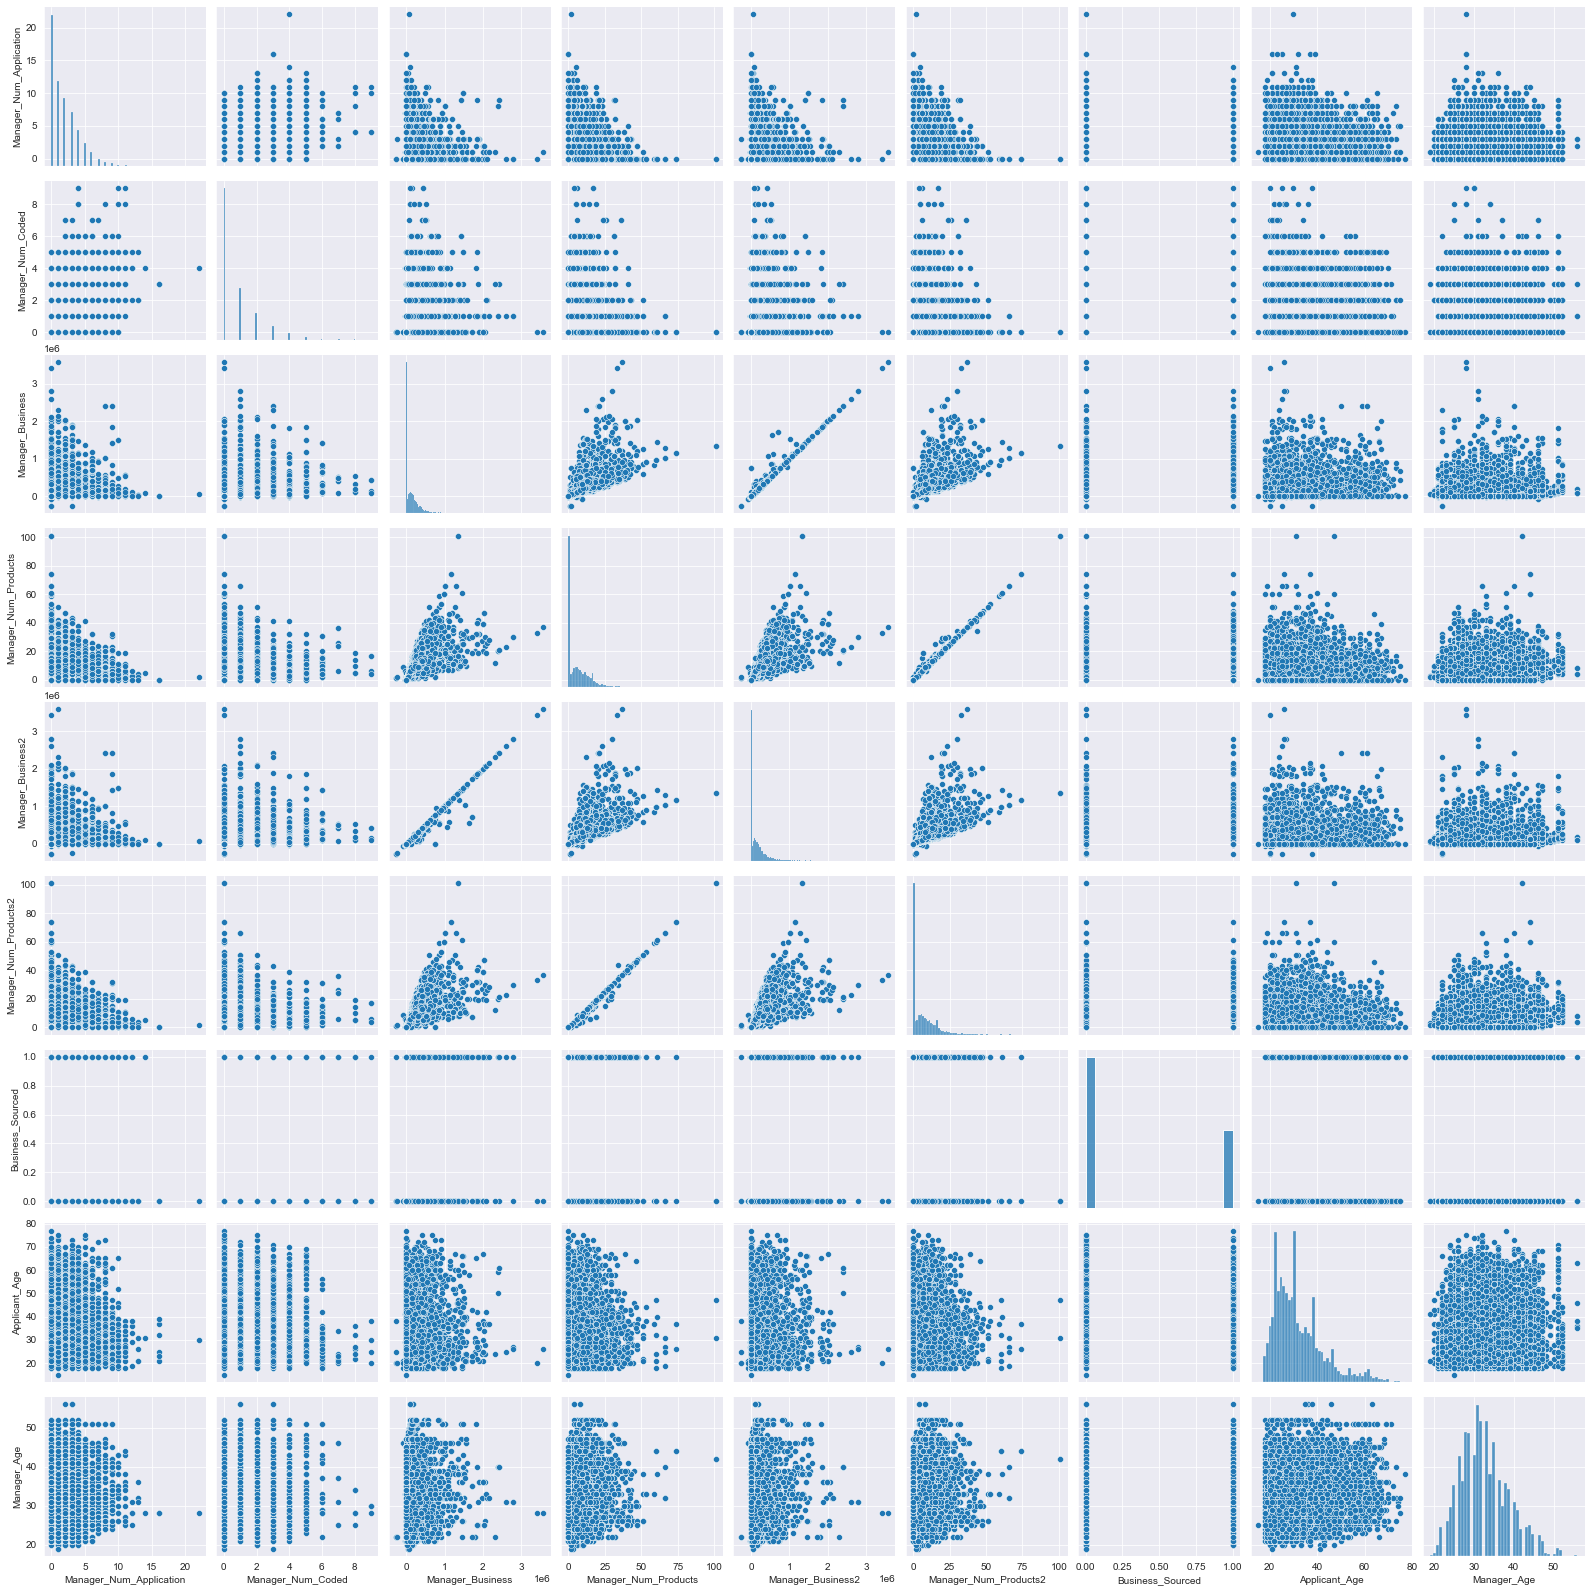

In [50]:
plt.figure(dpi=140)
sns.pairplot(data = df)

<AxesSubplot:xlabel='Manager_Num_Products', ylabel='Manager_Business'>

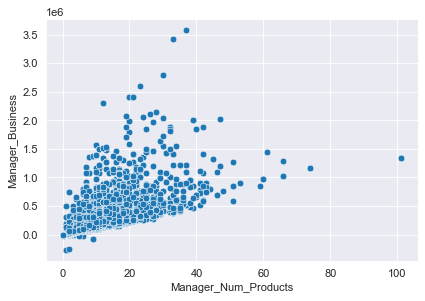

In [51]:
plt.figure(dpi=80)
sns.scatterplot(numerical['Manager_Num_Products'], numerical['Manager_Business'])

<AxesSubplot:xlabel='Manager_Num_Products2', ylabel='Manager_Business2'>

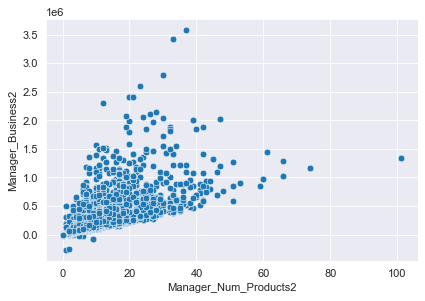

In [160]:
plt.figure(dpi=80)
sns.scatterplot(numerical['Manager_Num_Products2'], numerical['Manager_Business2'])

<AxesSubplot:xlabel='Manager_Num_Application', ylabel='Manager_Num_Coded'>

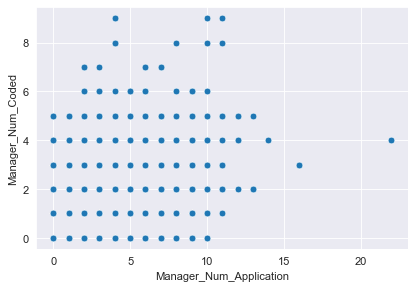

In [53]:
plt.figure(dpi=80)
sns.scatterplot(numerical['Manager_Num_Application'], numerical['Manager_Num_Coded'])

####  CATEGORICAL - CATEGORICAL

In [54]:
df.select_dtypes(include = [ 'category']).dtypes

Applicant_Gender               category
Applicant_Marital_Status       category
Applicant_Occupation           category
Applicant_Qualification        category
Manager_Joining_Designation    category
Manager_Current_Designation    category
Manager_Grade                  category
Manager_Status                 category
Manager_Gender                 category
Target_variable                category
applicant_age_range            category
manager_age_range              category
Manager_Business_Range         category
Manager_Products_Range         category
Manager_Business2_Range        category
Manager_Products2_Range        category
dtype: object

In [55]:
def BVA_categorical_plot(data, tar, cat):

  data = data[[cat,tar]][:]

  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  chi, p, dof, expected = chi2_contingency(f_obs)

  if p<0.05:
    sig = True
  else:
    sig = False

  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n Chi-square = {}".format(round(p,5),sig,round(chi,2)))

  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()*100
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()  

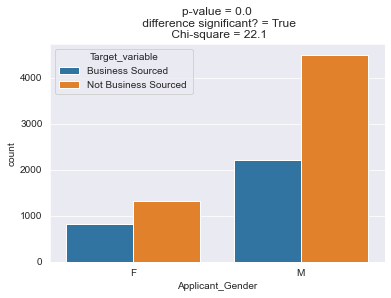

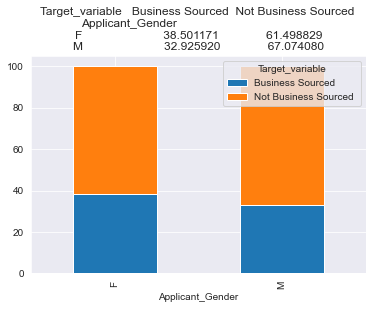

In [56]:
BVA_categorical_plot(df, 'Target_variable', 'Applicant_Gender')

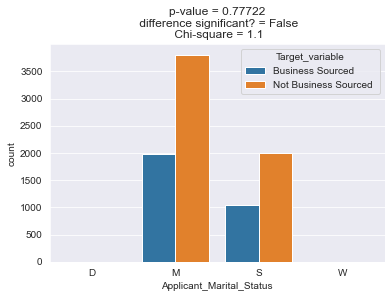

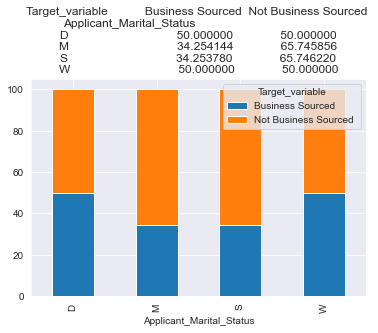

In [57]:
BVA_categorical_plot(df, 'Target_variable', 'Applicant_Marital_Status')

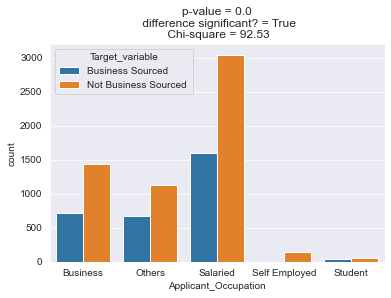

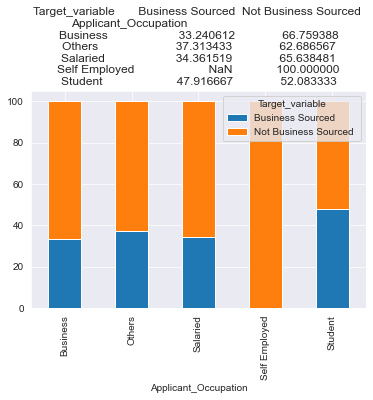

In [58]:
BVA_categorical_plot(df, 'Target_variable', 'Applicant_Occupation')

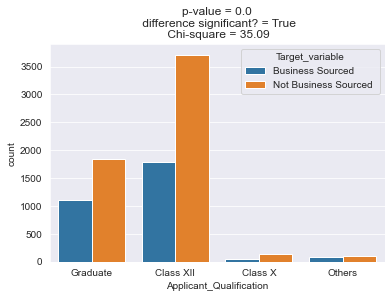

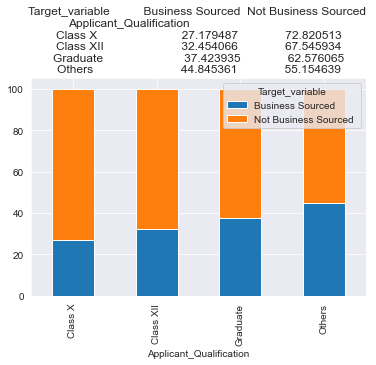

In [161]:
BVA_categorical_plot(df, 'Target_variable', 'Applicant_Qualification')

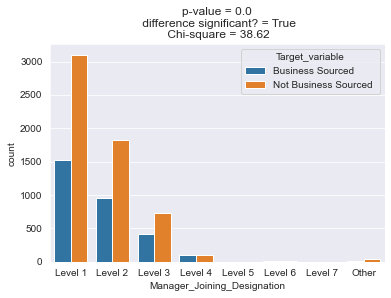

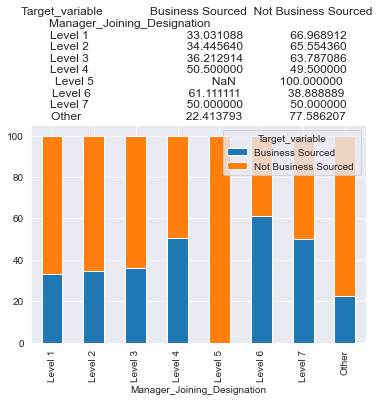

In [60]:
BVA_categorical_plot(df, 'Target_variable', 'Manager_Joining_Designation')

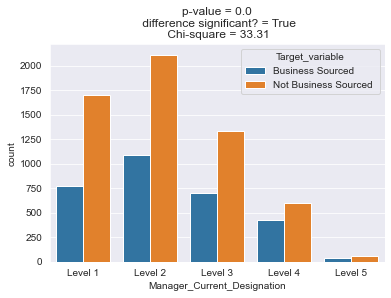

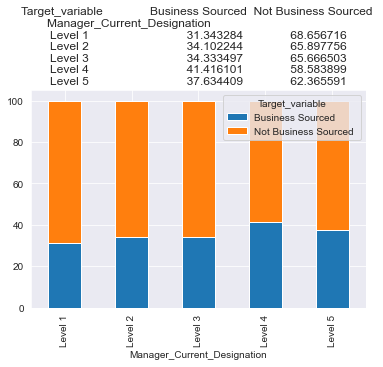

In [61]:
BVA_categorical_plot(df, 'Target_variable', 'Manager_Current_Designation')

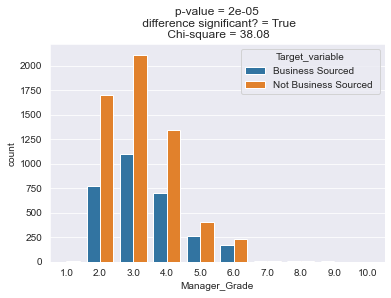

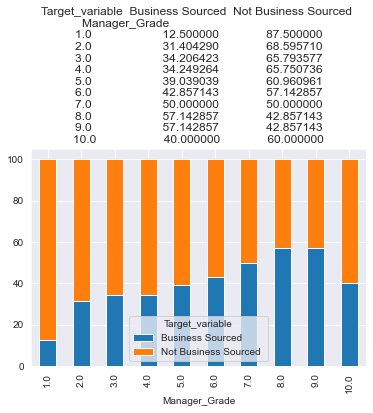

In [62]:
BVA_categorical_plot(df, 'Target_variable', 'Manager_Grade')

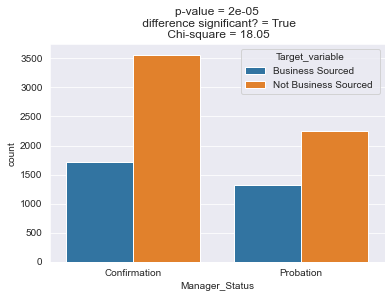

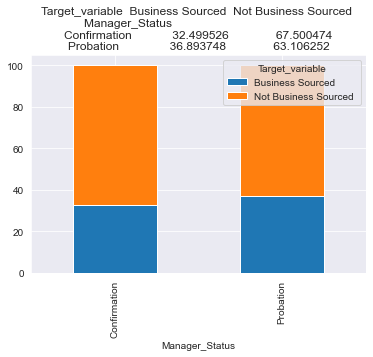

In [63]:
BVA_categorical_plot(df, 'Target_variable', 'Manager_Status')

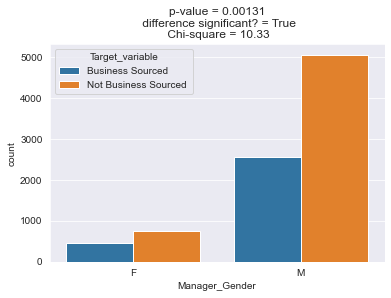

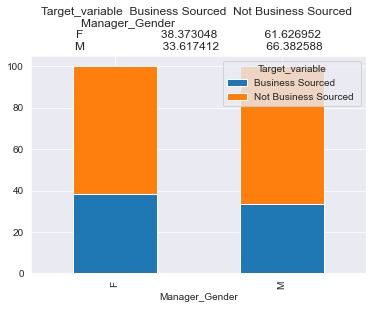

In [64]:
BVA_categorical_plot(df, 'Target_variable', 'Manager_Gender')

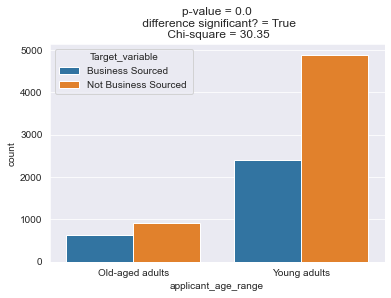

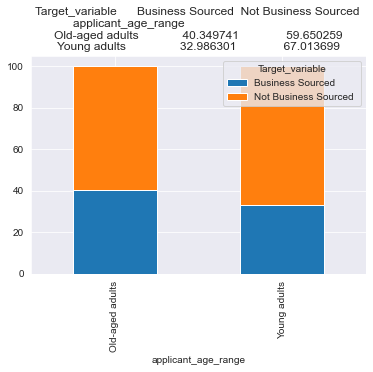

In [65]:
BVA_categorical_plot(df, 'Target_variable', 'applicant_age_range')

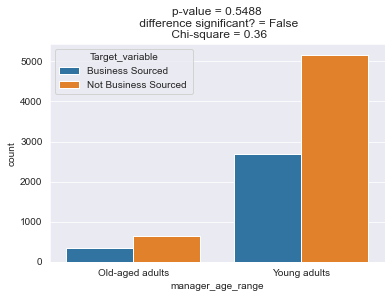

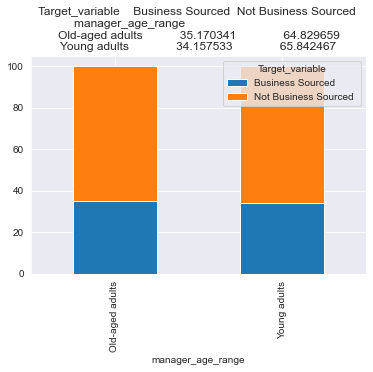

In [66]:
BVA_categorical_plot(df, 'Target_variable', 'manager_age_range')

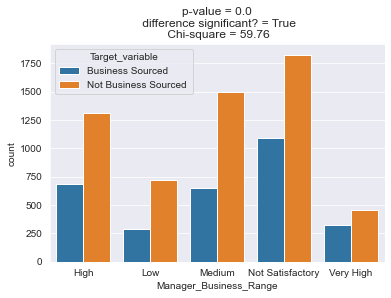

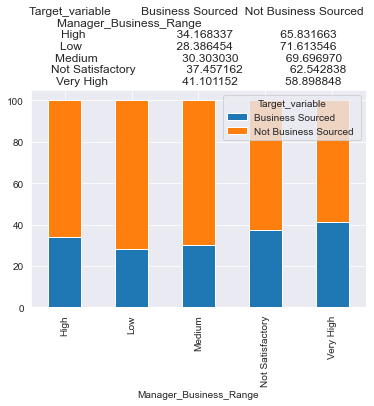

In [67]:
BVA_categorical_plot(df, 'Target_variable', 'Manager_Business_Range')

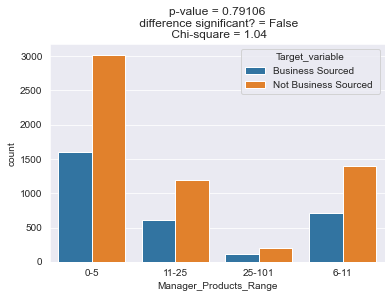

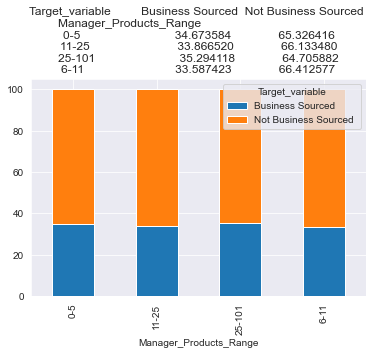

In [68]:
BVA_categorical_plot(df, 'Target_variable', 'Manager_Products_Range')

####  CATEGORICAL - NUMERICAL

In [69]:
df.dtypes

Applicant_Gender               category
Applicant_Marital_Status       category
Applicant_Occupation           category
Applicant_Qualification        category
Manager_Joining_Designation    category
Manager_Current_Designation    category
Manager_Grade                  category
Manager_Status                 category
Manager_Gender                 category
Manager_Num_Application           int64
Manager_Num_Coded                 int64
Manager_Business                  int64
Manager_Num_Products              int64
Manager_Business2                 int64
Manager_Num_Products2             int64
Business_Sourced                  int64
Target_variable                category
Applicant_Age                     int64
Manager_Age                       int64
applicant_age_range            category
manager_age_range              category
Manager_Business_Range         category
Manager_Products_Range         category
Manager_Business2_Range        category
Manager_Products2_Range        category


In [70]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def Bivariate_cont_cat(data, cont, cat, category):
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  t_p_val = round(TwoSampT(m1, m2, std1, std2, n1, n2),4)
  z_p_val = round(TwoSampZ(m1, m2, std1, std2, n1, n2),4)
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
  table = round(table,2)
  plt.figure(figsize = (15,6), dpi=140)
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val, z_p_val, table))
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

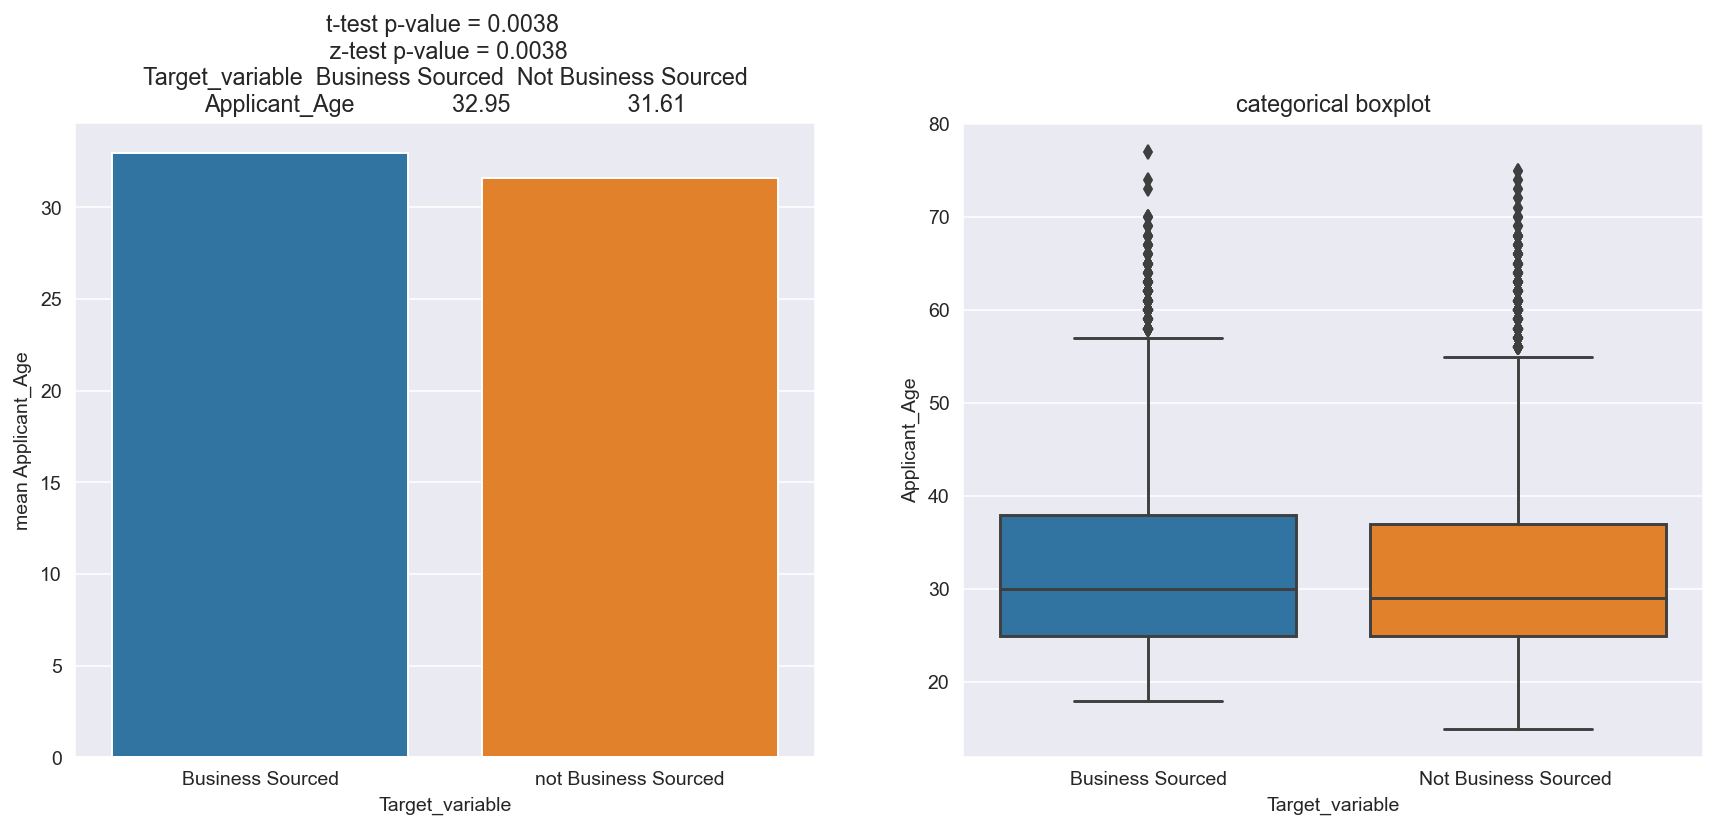

In [71]:
Bivariate_cont_cat(df, 'Applicant_Age', 'Target_variable', 'Business Sourced')

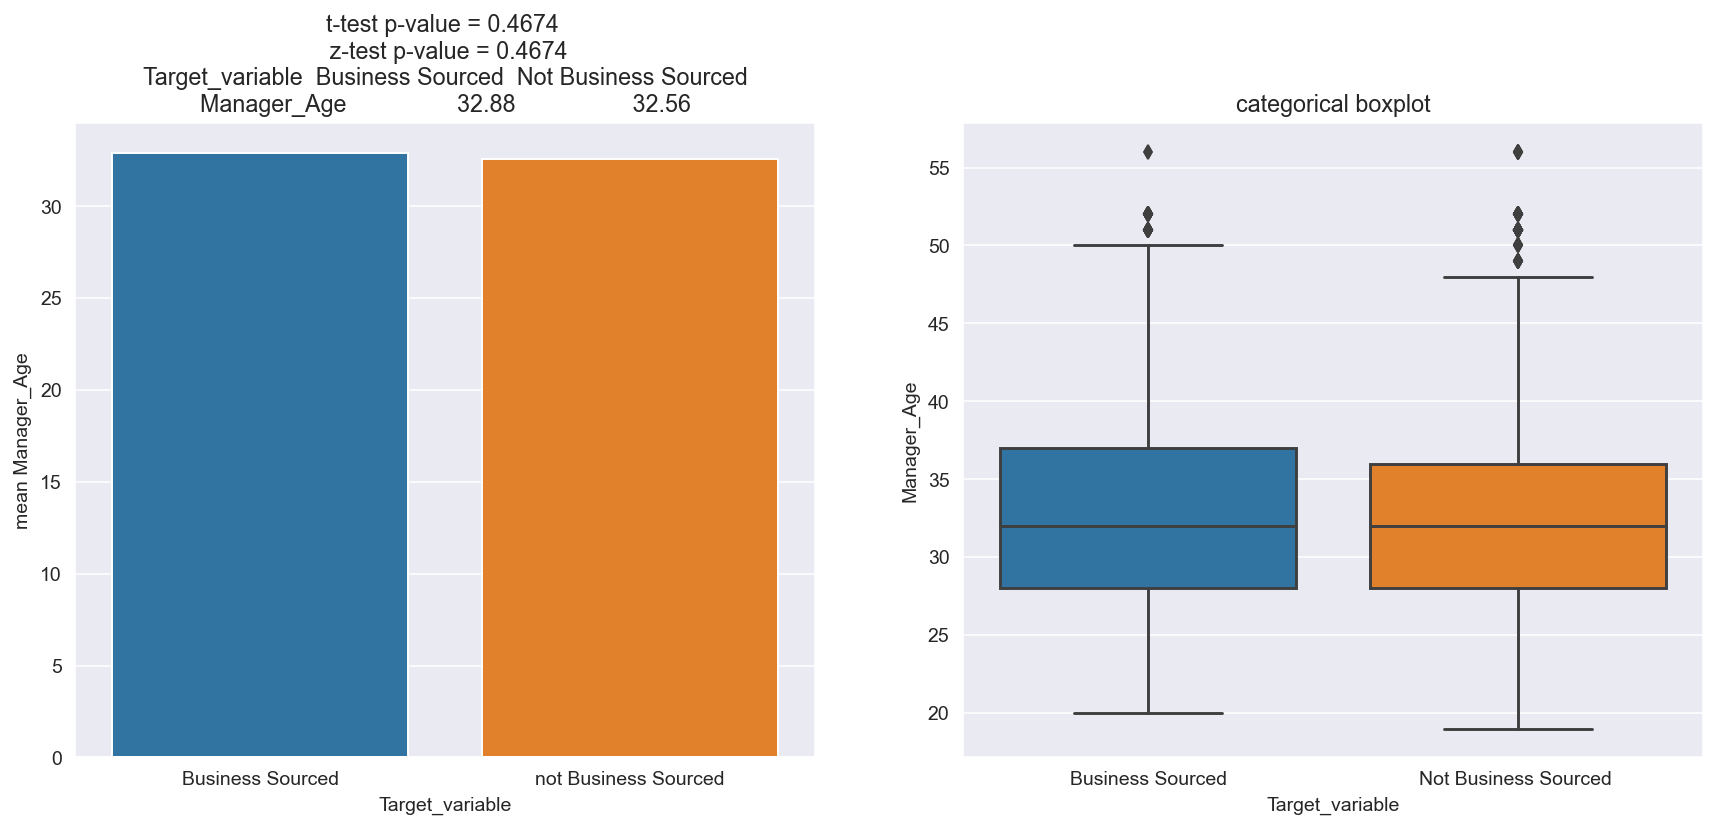

In [72]:
Bivariate_cont_cat(df, 'Manager_Age', 'Target_variable', 'Business Sourced')

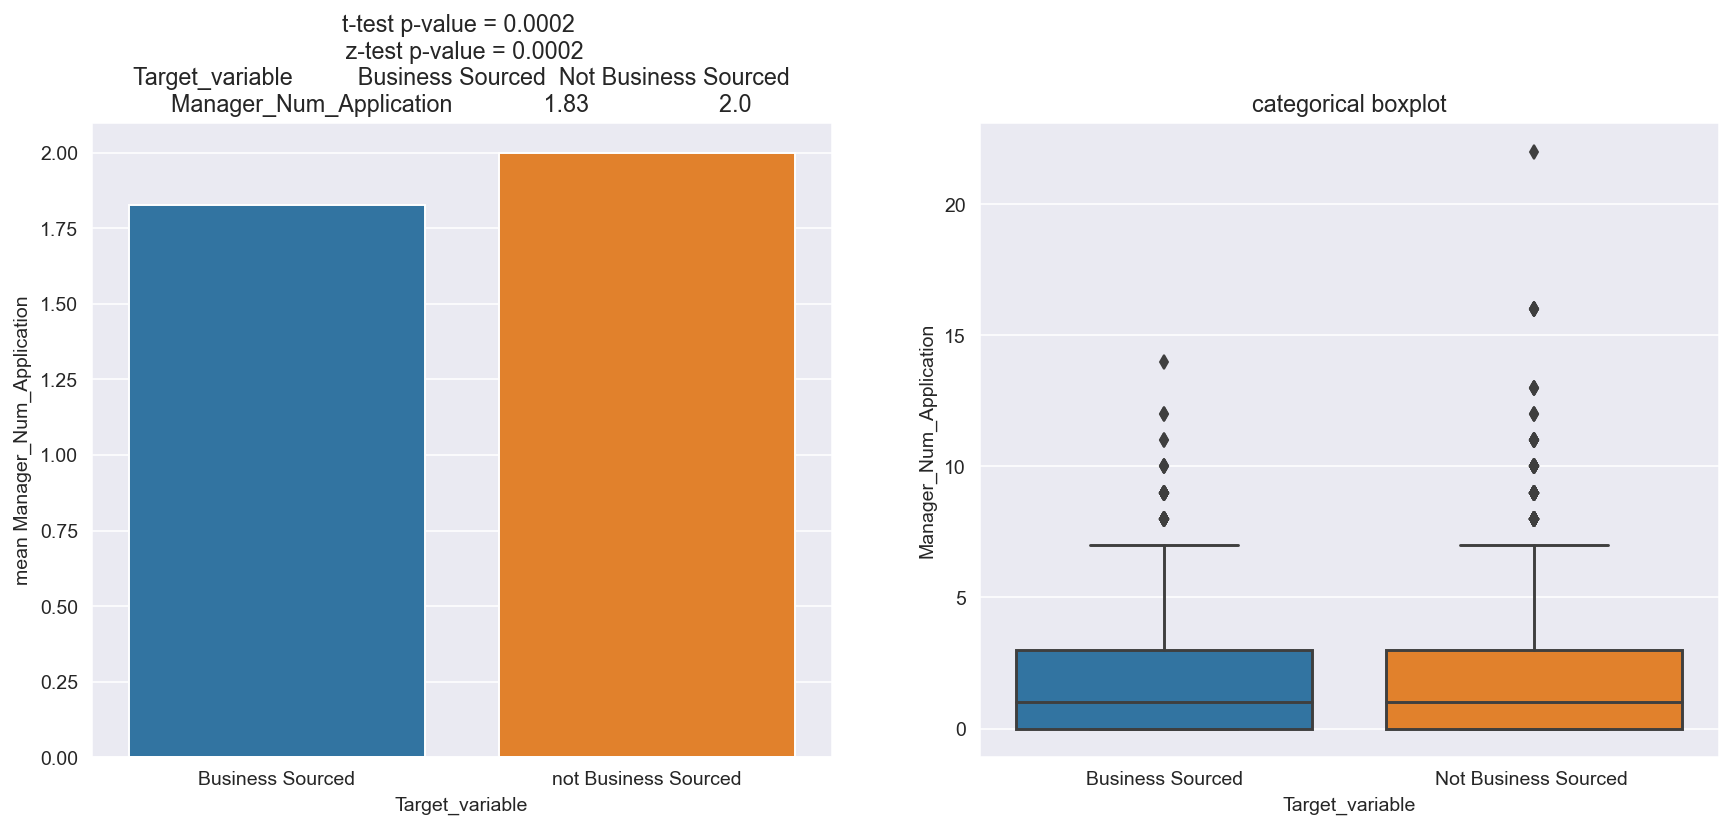

In [73]:
Bivariate_cont_cat(df, 'Manager_Num_Application', 'Target_variable', 'Business Sourced')

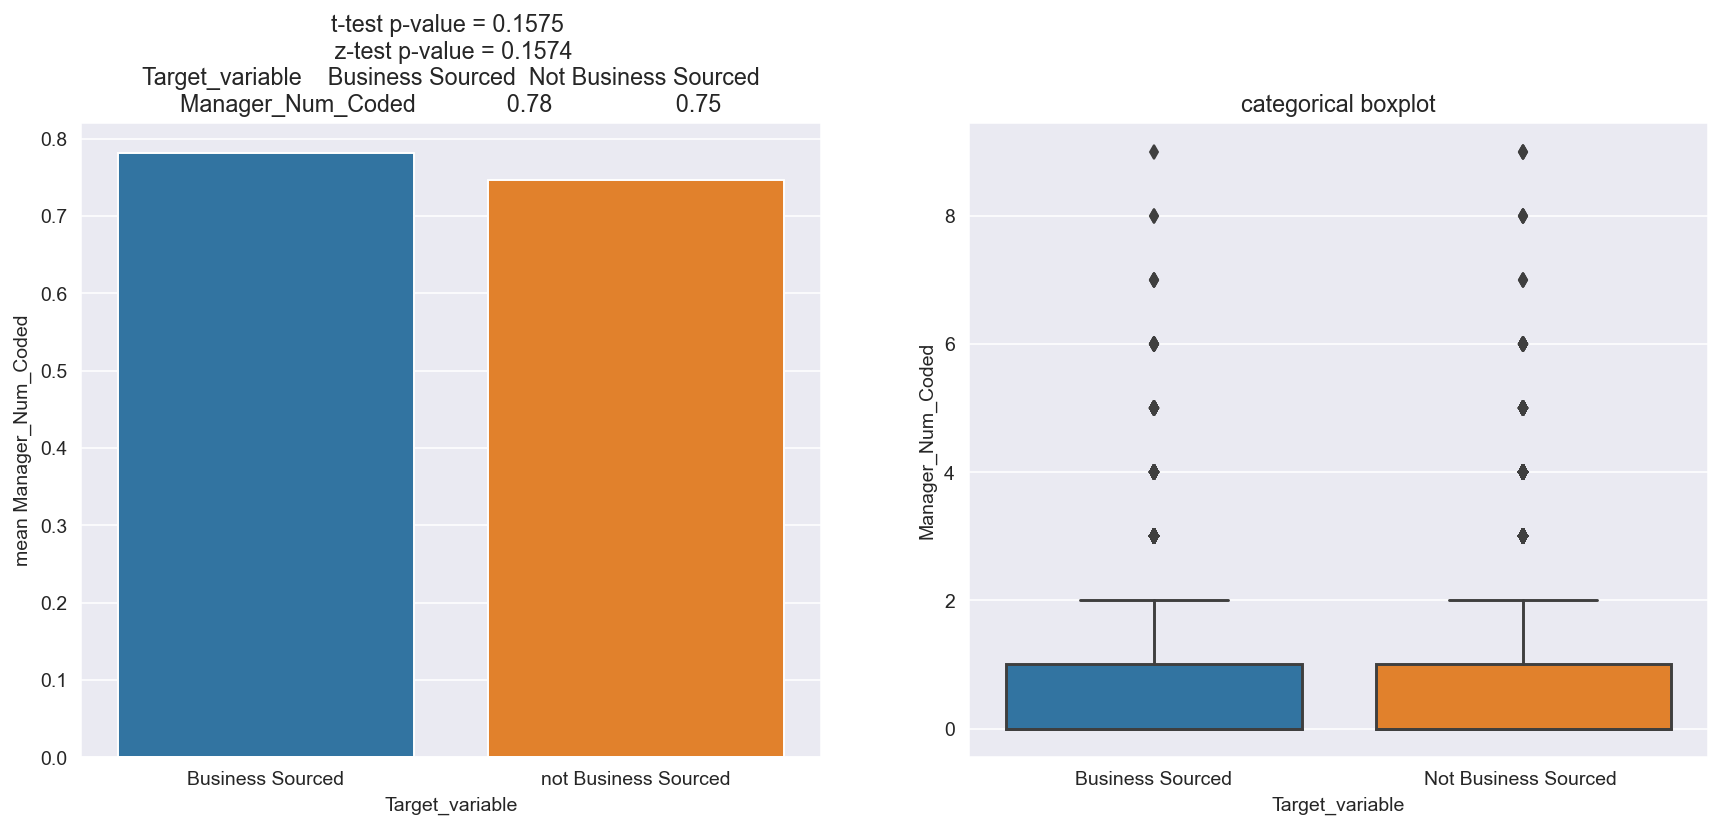

In [74]:
Bivariate_cont_cat(df, 'Manager_Num_Coded', 'Target_variable', 'Business Sourced')

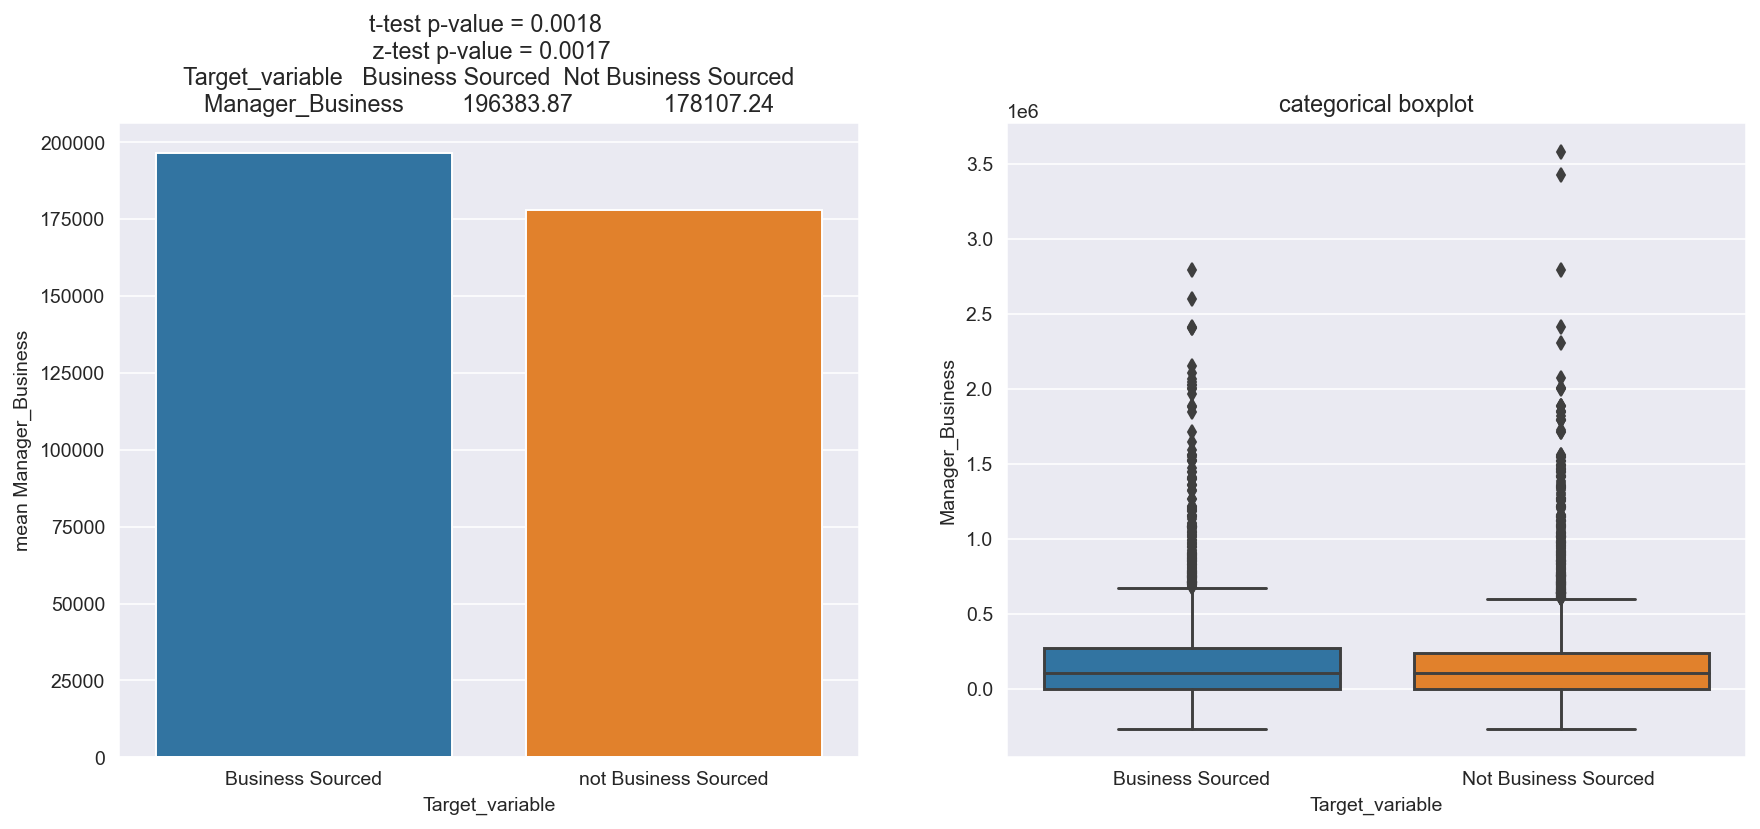

In [75]:
Bivariate_cont_cat(df, 'Manager_Business', 'Target_variable', 'Business Sourced')

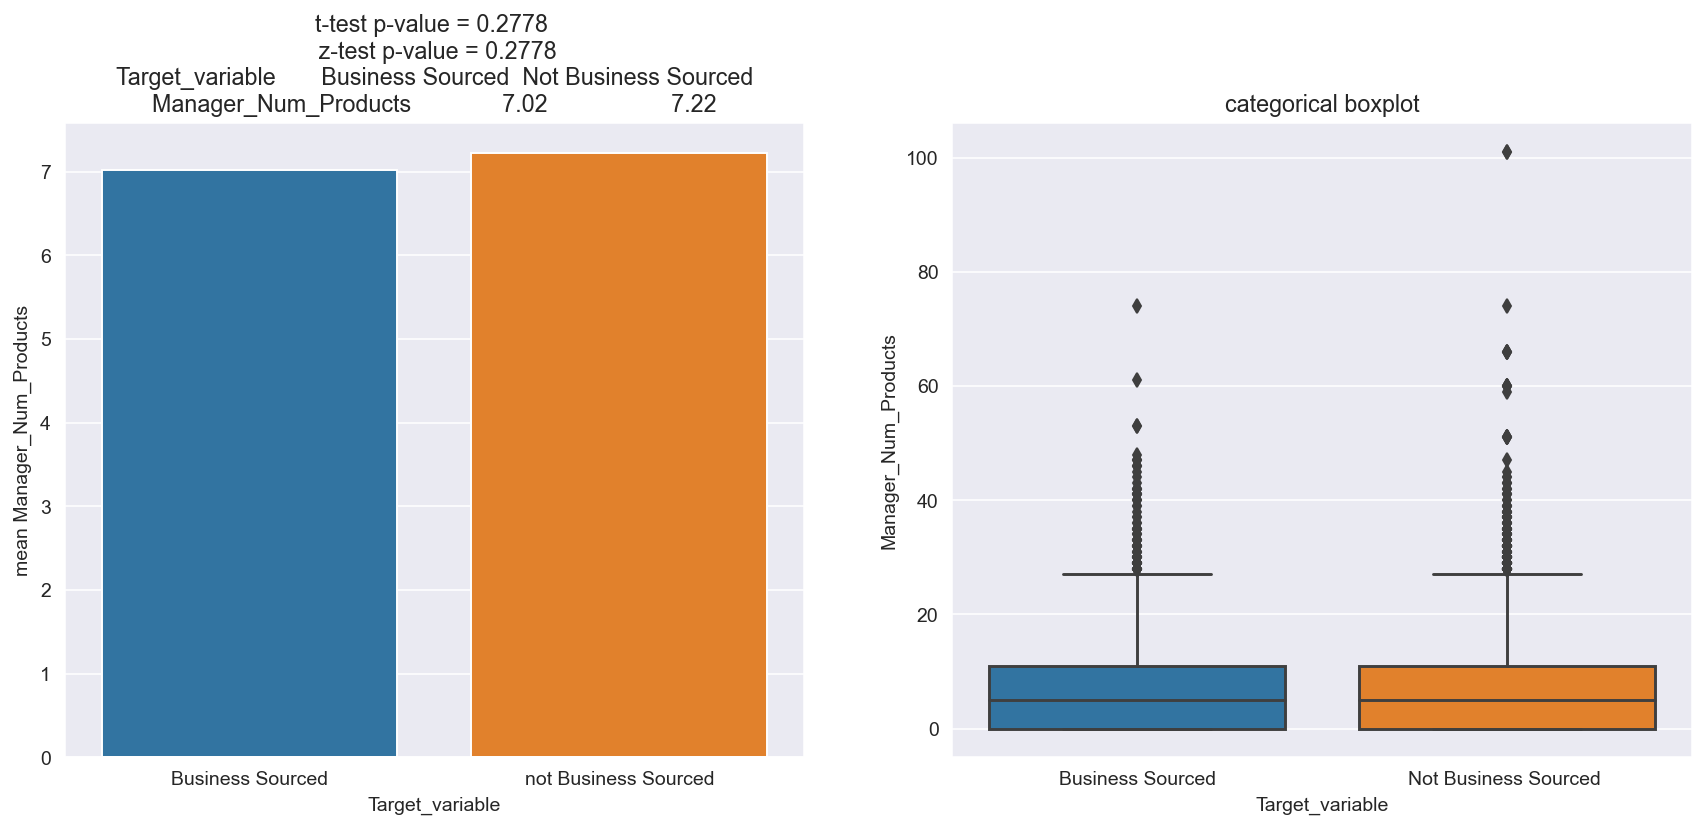

In [76]:
Bivariate_cont_cat(df, 'Manager_Num_Products', 'Target_variable', 'Business Sourced')

###  MULTIVARIATE ANALYSIS

In [167]:
df.pivot_table('Business_Sourced', ['Manager_Gender', 'manager_age_range'], 'Manager_Business_Range', aggfunc='sum')

Manager_Business_Range            High  Low  Medium  Not Satisfactory  \
Manager_Gender manager_age_range                                        
F              Old-aged adults      21    4      24                18   
               Young adults         75   32      56               156   
M              Old-aged adults      86   30      79                41   
               Young adults        500  219     491               878   

Manager_Business_Range            Very High  
Manager_Gender manager_age_range             
F              Old-aged adults           19  
               Young adults              62  
M              Old-aged adults           29  
               Young adults             211

In [164]:
GAC = df.pivot_table('Business_Sourced', ['Manager_Gender', 'manager_age_range'], 'Manager_Business_Range', aggfunc='mean')*100
round(GAC,2)

Manager_Business_Range             High    Low  Medium  Not Satisfactory  \
Manager_Gender manager_age_range                                           
F              Old-aged adults    44.68  25.00   47.06             50.00   
               Young adults       38.86  31.37   27.72             42.51   
M              Old-aged adults    33.20  30.00   29.59             40.20   
               Young adults       33.40  27.86   30.22             36.39   

Manager_Business_Range            Very High  
Manager_Gender manager_age_range             
F              Old-aged adults        45.24  
               Young adults           38.51  
M              Old-aged adults        37.18  
               Young adults           42.20

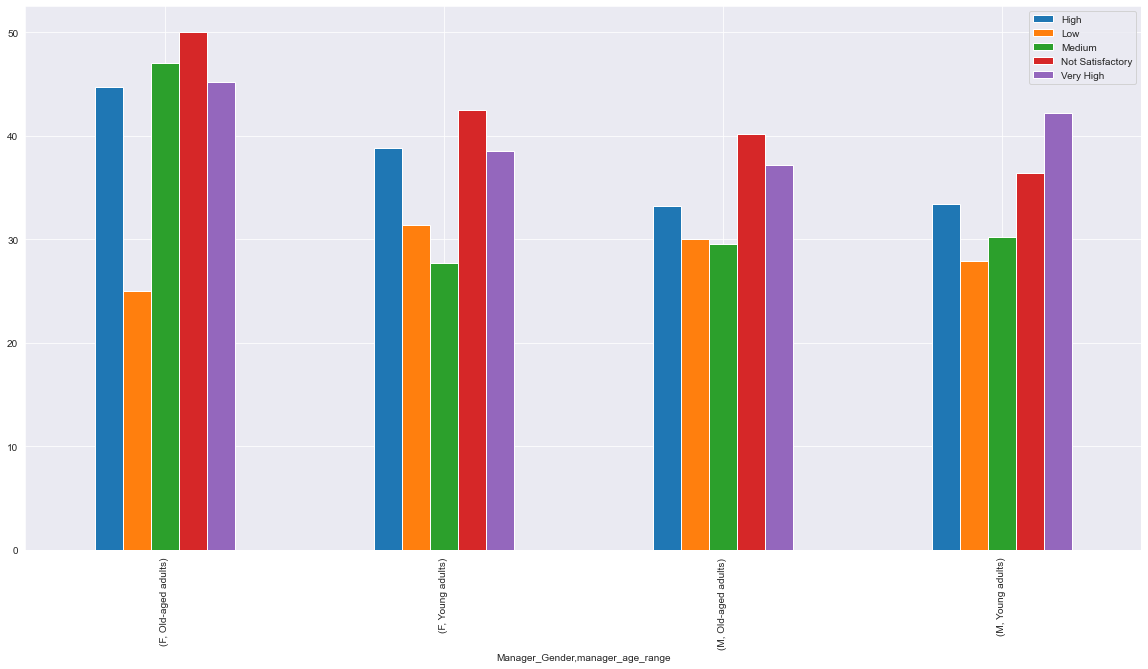

In [165]:
GAC.plot(kind = 'bar',figsize=(20, 10)).legend()
plt.legend()

In [90]:
df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Manager_Business_Range'], 'Applicant_Occupation', aggfunc='sum')

Applicant_Occupation                     Business  Others  Salaried  \
Applicant_Gender Manager_Business_Range                               
F                High                        28.0    62.0      97.0   
                 Low                          8.0    25.0      39.0   
                 Medium                      26.0    48.0      78.0   
                 Not Satisfactory            40.0    73.0     176.0   
                 Very High                   14.0    26.0      58.0   
M                High                       123.0   111.0     256.0   
                 Low                         61.0    37.0     106.0   
                 Medium                     131.0   119.0     237.0   
                 Not Satisfactory           239.0   132.0     418.0   
                 Very High                   47.0    42.0     128.0   

Applicant_Occupation                     Self Employed  Student  
Applicant_Gender Manager_Business_Range                          
F                High                              0.0      2.0  
                 Low                               NaN      6.0  
                 Medium                            0.0      5.0  
                 Not Satisfactory                  0.0      8.0  
                 Very High                         0.0      3.0  
M                High                              0.0      3.0  
                 Low                               0.0      3.0  
                 Medium                            0.0      6.0  
                 Not Satisfactory                  0.0      7.0  
                 Very High                         0.0      3.0

In [172]:
GEA = df.pivot_table('Business_Sourced', ['Applicant_Gender', 'Applicant_Qualification'], 'Manager_Business2_Range', aggfunc='mean')*100
round(GEA,2)

Manager_Business2_Range                    High    Low  Medium  \
Applicant_Gender Applicant_Qualification                         
F                Class X                  50.00   0.00   44.44   
                 Class XII                39.22  30.52   33.11   
                 Graduate                 42.20  32.95   34.25   
                 Others                   20.00  28.57   55.56   
M                Class X                  19.23  25.00   25.86   
                 Class XII                31.23  24.75   28.29   
                 Graduate                 34.43  33.02   32.94   
                 Others                   50.00  40.00   34.78   

Manager_Business2_Range                   Not Satisfactory  Very High  
Applicant_Gender Applicant_Qualification                               
F                Class X                             25.00     100.00  
                 Class XII                           39.64      44.25  
                 Graduate                            43.23      38.68  
                 Others                              44.44      80.00  
M                Class X                             34.29      25.00  
                 Class XII                           35.06      35.38  
                 Graduate                            37.59      45.90  
                 Others                              42.62      50.00

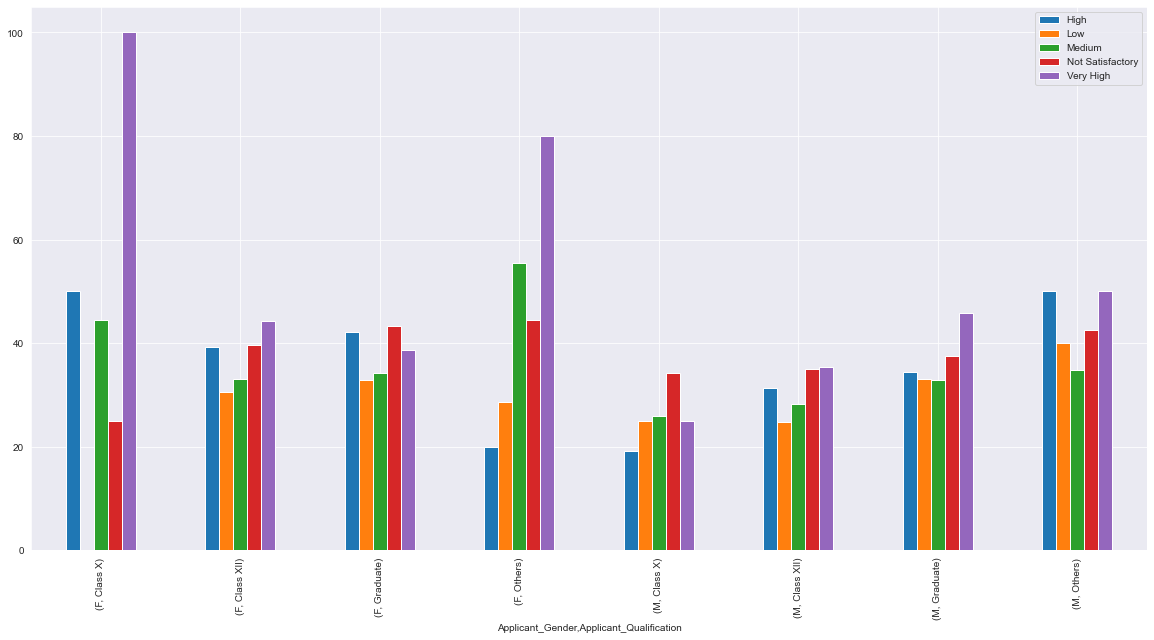

In [173]:
GEA.plot(kind = 'bar',figsize=(20, 10)).legend()
plt.legend()

In [170]:
GECA = df.pivot_table('Business_Sourced', ['Manager_Gender','Manager_Status' ], ['Manager_Business2_Range', 'manager_age_range'], aggfunc='mean')*100
round(GECA,2)

Manager_Business2_Range                  High                          Low  \
manager_age_range             Old-aged adults Young adults Old-aged adults   
Manager_Gender Manager_Status                                                
F              Confirmation             44.68        36.42           36.36   
               Probation                  NaN        60.00            0.00   
M              Confirmation             33.20        33.10           31.17   
               Probation                  NaN        34.48           26.09   

Manager_Business2_Range                             Medium               \
manager_age_range             Young adults Old-aged adults Young adults   
Manager_Gender Manager_Status                                             
F              Confirmation          26.00           47.06        28.48   
               Probation             36.00             NaN        25.00   
M              Confirmation          25.22           30.38        29.14   
               Probation             31.36            0.00        40.66   

Manager_Business2_Range       Not Satisfactory                    Very High  \
manager_age_range              Old-aged adults Young adults Old-aged adults   
Manager_Gender Manager_Status                                                 
F              Confirmation                NaN        33.33           45.24   
               Probation                 50.00        42.28             NaN   
M              Confirmation               0.00        33.33           37.18   
               Probation                 43.16        36.44             NaN   

Manager_Business2_Range                     
manager_age_range             Young adults  
Manager_Gender Manager_Status               
F              Confirmation          39.10  
               Probation             33.33  
M              Confirmation          42.45  
               Probation               NaN

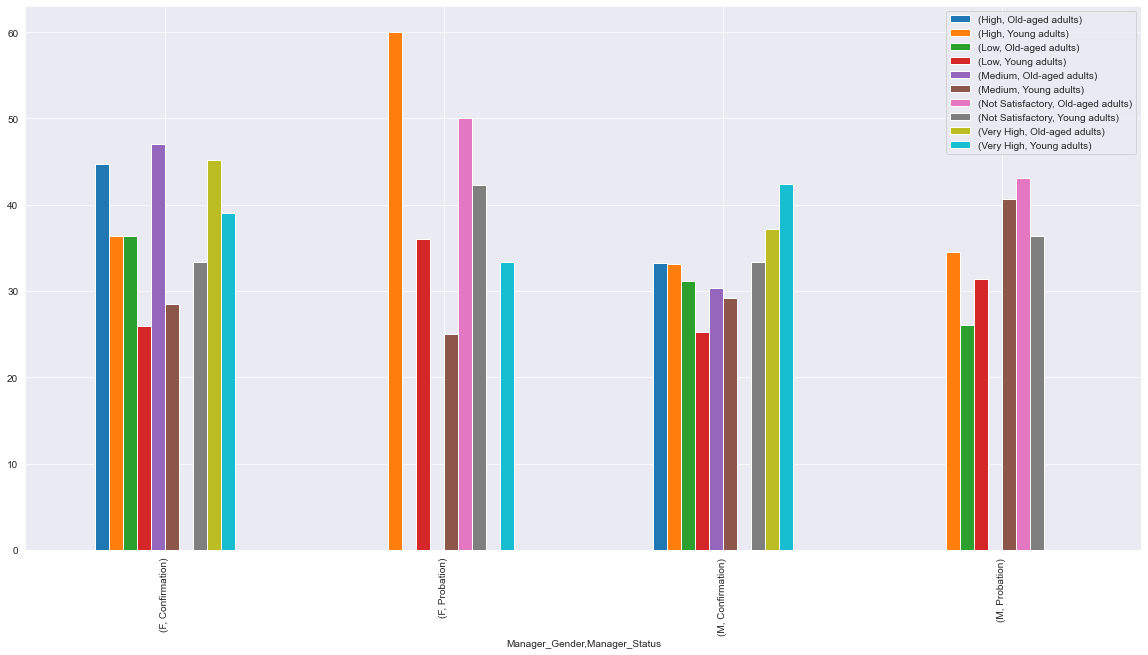

In [171]:
GECA.plot(kind='bar',figsize=(20, 10)).legend()
plt.legend()


In [141]:
abc = GEA = df.pivot_table('Business_Sourced', ['Manager_Gender', 'Manager_Status'], 'Manager_Business2_Range', aggfunc='mean')*100
round(GEA,2)

Manager_Business2_Range         High    Low  Medium  Not Satisfactory  \
Manager_Gender Manager_Status                                           
F              Confirmation    38.18  27.87   32.87             33.33   
               Probation       60.00  32.73   25.00             42.96   
M              Confirmation    33.12  26.10   29.33             28.26   
               Probation       34.48  31.02   39.15             36.70   

Manager_Business2_Range        Very High  
Manager_Gender Manager_Status             
F              Confirmation        40.40  
               Probation           33.33  
M              Confirmation        41.74  
               Probation             NaN

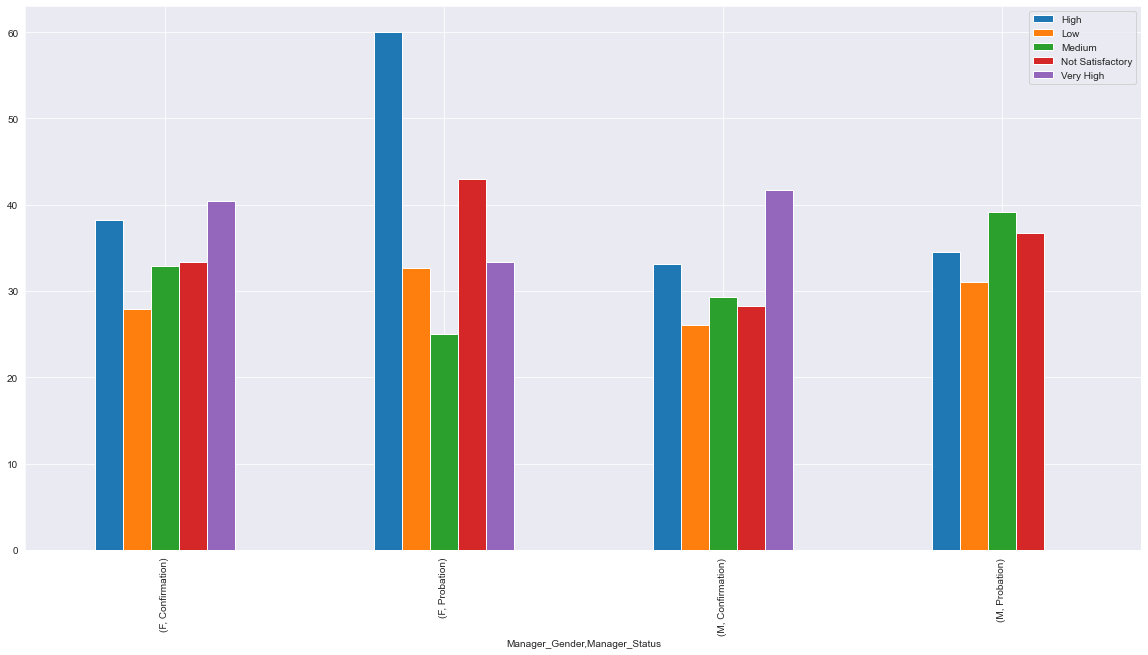

In [142]:
abc.plot(kind='bar',figsize=(20, 10)).legend()
plt.legend()

### outliers

In [80]:
sort_data = np.sort(df['Manager_Num_Application'])
sort_data

array([ 0,  0,  0, ..., 16, 16, 22], dtype=int64)

In [81]:
Q1 = np.percentile(sort_data, 25, interpolation = 'midpoint') 
Q2 = np.percentile(sort_data, 50, interpolation = 'midpoint') 
Q3 = np.percentile(sort_data, 75, interpolation = 'midpoint') 
  
print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 50 percentile of the given data is, ', Q2)
print('Q1 75 percentile of the given data is, ', Q3)
  
IQR = Q3 - Q1 
print('Interquartile range is', IQR)

Q1 25 percentile of the given data is,  0.0
Q1 50 percentile of the given data is,  1.0
Q1 75 percentile of the given data is,  3.0
Interquartile range is 3.0


In [82]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -4.5
up_limit is 7.5


In [83]:
outlier =[]
for x in sort_data:
    if ((x > up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

 outlier in the dataset is [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 16, 16, 16, 16, 16, 16, 22]


In [89]:
df.dtypes

Applicant_Gender               category
Applicant_Marital_Status       category
Applicant_Occupation           category
Applicant_Qualification        category
Manager_Joining_Designation    category
Manager_Current_Designation    category
Manager_Grade                  category
Manager_Status                 category
Manager_Gender                 category
Manager_Num_Application           int64
Manager_Num_Coded                 int64
Manager_Business                  int64
Manager_Num_Products              int64
Manager_Business2                 int64
Manager_Num_Products2             int64
Business_Sourced                  int64
Target_variable                category
Applicant_Age                     int64
Manager_Age                       int64
applicant_age_range            category
manager_age_range              category
Manager_Business_Range         category
Manager_Products_Range         category
Manager_Business2_Range        category
Manager_Products2_Range        category
